# Exploratory Analysis
This notebook uses the cleaned dataset to perform the exploratory analysis. The aim is to identify the relevant variables and chech its relation with the target variable. Also, we will create the homicides variable from the homicides dataset.

In [1]:
#!pip install missingno

# Variables analysis

In this notebook, the analized variables are the 'ESTU' (student) variables second part, including academic, university, socio-economic, job.

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
#import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
#import missingno as msno
from src import funcs
from statsmodels.formula.api import ols

## Dataset loading

In [2]:
df_all = pd.read_csv('./saberpro_2016-2019_cleaned_v3.zip',sep=';')
print(df_all.shape)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11,12,14,25,26,39,42,43,44,93,94,99,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(963255, 110)


In [3]:
df_vio_mun = pd.read_csv('Homicidios_municipio.zip')
print(df_vio_mun.shape)

(8198, 7)


In [5]:
df_vio_mun.head()

YEAR  MUNICIPIO  CODIGO DANE  HOMICIDIOS        DEPARTAMENTO  \
0  2010  ABEJORRAL         5002         4.0           Antioquia   
1  2010     ABREGO        54003         8.0  Norte de Santander   
2  2010    ACACÍAS        50006        30.0                Meta   
3  2010     ACANDÍ        27006         2.0               Chocó   
4  2010    ACEVEDO        41006        12.0               Huila   

   POBLACION TOTAL  TASA_HOMICIDIOS  
0          21355.0        18.730976  
1          33554.0        23.842165  
2          65522.0        45.786148  
3          12547.0        15.940065  
4          28142.0        42.640893

In [6]:
def func_tasa_hom(vars_vio,y_prev=4):

    cod_mun, year = vars_vio[0], vars_vio[1]
    years_vio = np.arange(year-y_prev-1,year+1).astype(int)
    TASA_HOMICIDIOS_AVG = df_vio_mun.loc[(df_vio_mun['YEAR'].isin(years_vio))&
                                         (df_vio_mun['CODIGO DANE']==cod_mun),
                                         'TASA_HOMICIDIOS'].mean()
    return TASA_HOMICIDIOS_AVG

df_all['TASA_HOMICIDIOS_4'] = df_all[['ESTU_COD_RESIDE_MCPIO','YEAR']].apply(func_tasa_hom,axis=1)

In [14]:
def func_tasa_hom(vars_vio,y_prev=1):

    cod_mun, year = vars_vio[0], vars_vio[1]
    years_vio = np.arange(year-y_prev-1,year+1).astype(int)
    TASA_HOMICIDIOS_AVG = df_vio_mun.loc[(df_vio_mun['YEAR'].isin(years_vio))&
                                         (df_vio_mun['CODIGO DANE']==cod_mun),
                                         'TASA_HOMICIDIOS'].mean()
    return TASA_HOMICIDIOS_AVG

df_all['TASA_HOMICIDIOS_1'] = df_all[['ESTU_COD_RESIDE_MCPIO','YEAR']].apply(func_tasa_hom,axis=1)

In [15]:
df_all.to_csv('./saberpro_2016-2019_cleaned_v4.csv',sep=';',index=False)

## Dataset partition

In [2]:
df_all = pd.read_csv('./saberpro_2016-2019_cleaned_v4.zip',sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11,12,14,25,26,39,42,43,44,92,93,98,106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_2019 = df_all[df_all['YEAR']==2019]
df_N2019 = df_all[df_all['YEAR']!=2019]

df_devel, df_test = train_test_split(df_2019, test_size=0.2, random_state=666)
df_devel = pd.concat([df_devel,df_N2019])
df_clean, df_val = train_test_split(df_devel, test_size=0.05, random_state=667)
print(df_test['YEAR'].unique())
print(df_clean['YEAR'].unique(), df_val['YEAR'].unique())
print('-------------------------------------------')
print(df_clean.shape, df_val.shape, df_test.shape)

[2019]
[2016 2017 2018 2019] [2016 2019 2017 2018]
-------------------------------------------
(865679, 111) (45563, 111) (52013, 111)


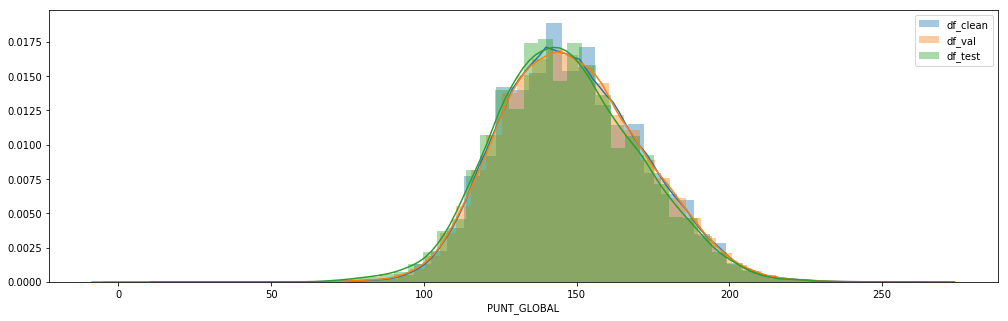

In [4]:
fig, axes = plt.subplots(figsize=(17, 5))

sns.distplot(df_clean['PUNT_GLOBAL'], label='df_clean')
sns.distplot(df_val['PUNT_GLOBAL'], label='df_val')
sns.distplot(df_test['PUNT_GLOBAL'], label='df_test')

plt.legend()
plt.show()

# Exploratory analysis

In [5]:
list(df_clean.columns)

['ESTU_TIPODOCUMENTO',
 'ESTU_NACIONALIDAD',
 'ESTU_GENERO',
 'ESTU_FECHANACIMIENTO',
 'ESTU_EXTERIOR',
 'PERIODO',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_AREARESIDE',
 'ESTU_ESTADOCIVIL',
 'ESTU_COLE_TERMINO',
 'ESTU_OTROCOLE_TERMINO',
 'ESTU_TITULOOBTENIDOBACHILLER',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_COMOCAPACITOEXAMENSB11',
 'ESTU_CURSODOCENTESIES',
 'ESTU_CURSOIESAPOYOEXTERNO',
 'ESTU_CURSOIESEXTERNA',
 'ESTU_SIMULACROTIPOICFES',
 'ESTU_ACTIVIDADREFUERZOAREAS',
 'ESTU_ACTIVIDADREFUERZOGENERIC',
 'ESTU_TIPODOCUMENTOSB11',
 'ESTU_SEMESTRECURSA',
 'FAMI_HOGARACTUAL',
 'FAMI_CABEZAFAMILIA',
 'FAMI_NUMPERSONASACARGO',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_CUARTOSHOGAR',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENETELEVISOR',
 'FAMI_

Here we deal with:
'ESTU_AREARESIDE','ESTU_TITULOOBTENIDOBACHILLER','ESTU_VALORMATRICULAUNIVERSIDAD',
'ESTU_SEMESTRECURSA','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET','ESTU_HORASSEMANATRABAJA',
'INST_NOMBRE_INSTITUCION','ESTU_PRGM_ACADEMICO','GRUPOREFERENCIA','ESTU_METODO_PRGM',
'INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD','ESTU_INSE_INDIVIDUAL','YEAR','PAGOMATRICULA'

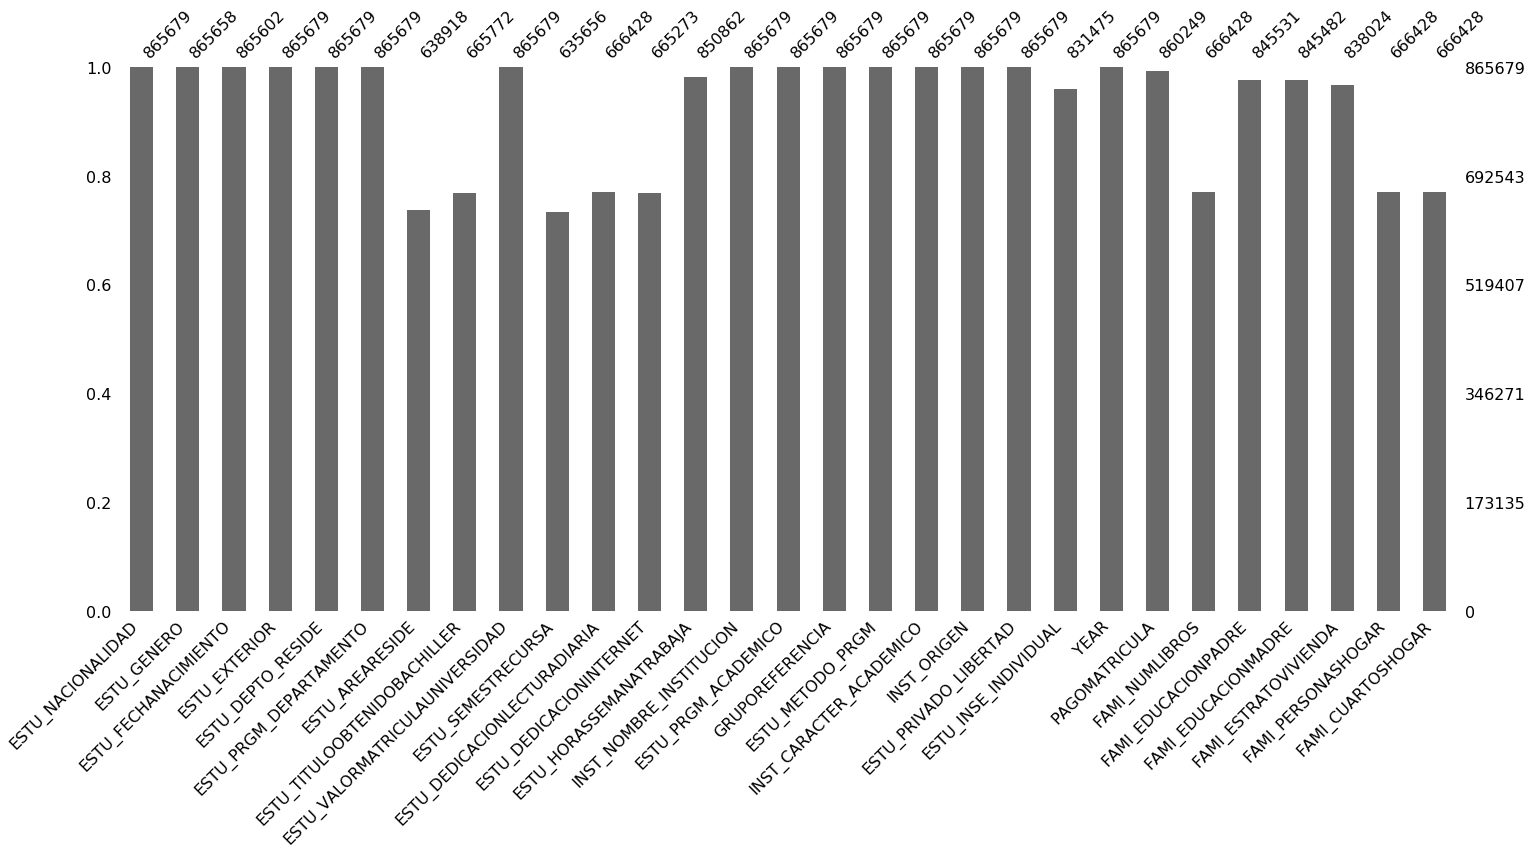

In [6]:
list_vars = ['ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_FECHANACIMIENTO',
             'ESTU_EXTERIOR','ESTU_DEPTO_RESIDE','ESTU_PRGM_DEPARTAMENTO',
             
             'ESTU_AREARESIDE','ESTU_TITULOOBTENIDOBACHILLER','ESTU_VALORMATRICULAUNIVERSIDAD',
             'ESTU_SEMESTRECURSA','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET','ESTU_HORASSEMANATRABAJA',
             'INST_NOMBRE_INSTITUCION','ESTU_PRGM_ACADEMICO','GRUPOREFERENCIA',
             'ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD',
             'ESTU_INSE_INDIVIDUAL','YEAR','PAGOMATRICULA',
            
             'FAMI_NUMLIBROS','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA',
             'FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR'
            ]
msno.bar(df_clean[list_vars])

# Individual Analysis

## Violence Variables

In [6]:
cols_vio = ['TASA_HOMICIDIOS_4','TASA_HOMICIDIOS_1',]

for col in cols_vio:
    print(df_clean[col].describe())

count    861524.000000
mean         23.999011
std          15.167664
min           2.130989
25%          16.437951
50%          17.999565
75%          27.164688
max         266.489007
Name: TASA_HOMICIDIOS_4, dtype: float64
count    860524.000000
mean         23.315186
std          14.918392
min           2.112168
25%          15.741214
50%          18.122237
75%          25.808366
max         279.426254
Name: TASA_HOMICIDIOS_1, dtype: float64


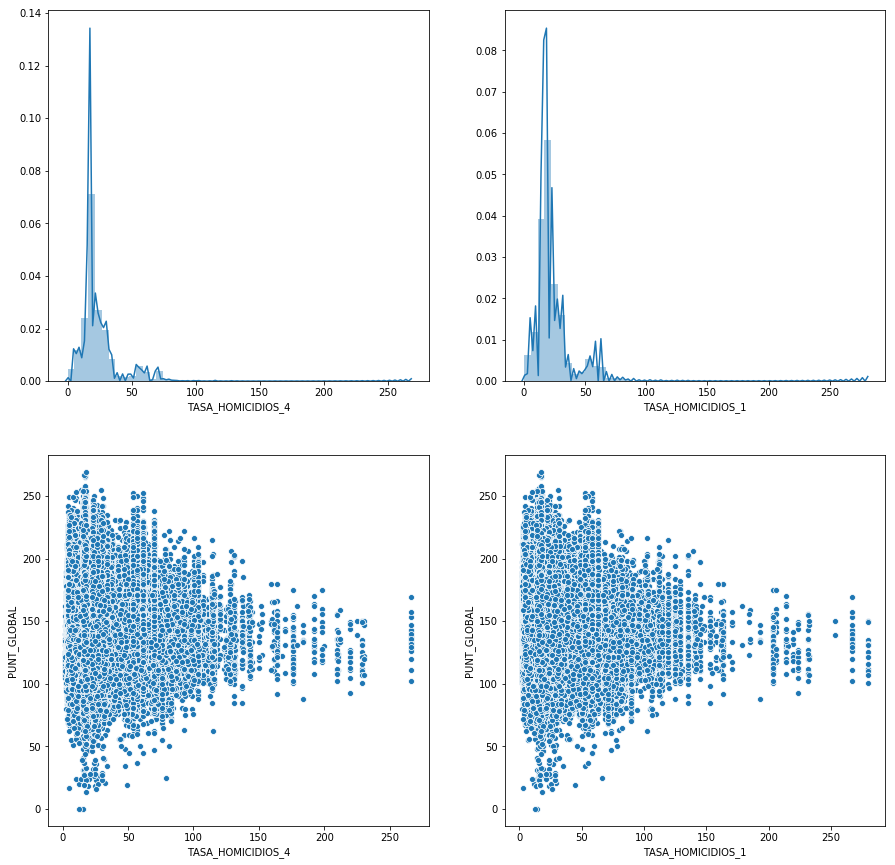

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i,col in enumerate(cols_vio):
    sns.distplot(df_clean[col].fillna(0), ax=axes[0, i])

for i,col in enumerate(cols_vio):
    sns.scatterplot(x=col, y='PUNT_GLOBAL', data=df_clean, ax=axes[1, i])
plt.show()

In [8]:
df_clean['TASA_HOMICIDIOS_4_LOG'] = np.log(df_clean['TASA_HOMICIDIOS_4'])
df_clean['TASA_HOMICIDIOS_1_LOG'] = np.log(df_clean['TASA_HOMICIDIOS_1'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


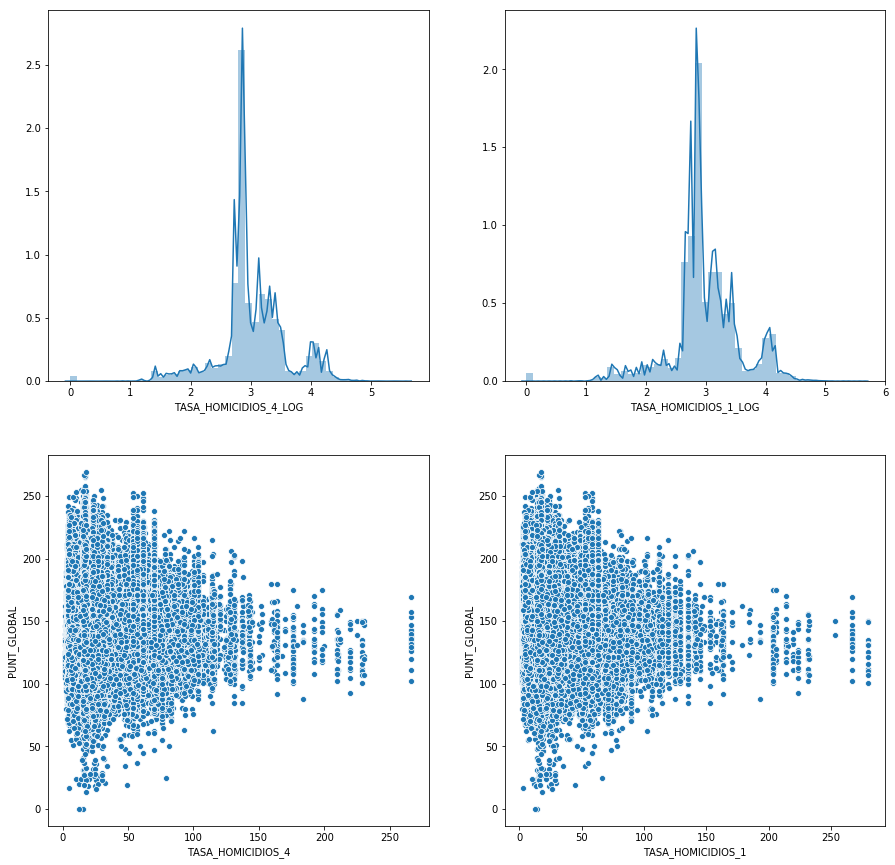

In [9]:
cols_vio_log = ['TASA_HOMICIDIOS_4_LOG','TASA_HOMICIDIOS_1_LOG',]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i,col in enumerate(cols_vio_log):
    df_clean[col]
    sns.distplot(df_clean[col].fillna(0), ax=axes[0, i])

for i,col in enumerate(cols_vio):
    sns.scatterplot(x=col, y='PUNT_GLOBAL', data=df_clean, ax=axes[1, i])
plt.show()

##  Familia Variables

In [10]:
cols_fam = ['FAMI_NUMLIBROS','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA',
            'FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR']

for col in cols_fam:
    print(df_clean[col].value_counts(dropna=False))
    print('-------------------------------------------')

0 A 10 LIBROS        203703
NaN                  199251
11 A 25 LIBROS       197174
26 A 100 LIBROS      194454
MÁS DE 100 LIBROS     71097
Name: FAMI_NUMLIBROS, dtype: int64
-------------------------------------------
Secundaria (Bachillerato) completa      172656
Primaria incompleta                     145105
Educación profesional completa          109348
Secundaria (Bachillerato) incompleta     95572
Primaria completa                        83539
Técnica o tecnológica completa           75671
Postgrado                                52724
Ninguno                                  31734
Educación profesional incompleta         30017
Técnica o tecnológica incompleta         25491
No sabe/No Aplica                        23674
NaN                                      20148
Name: FAMI_EDUCACIONPADRE, dtype: int64
-------------------------------------------
Secundaria (Bachillerato) completa      191187
Primaria incompleta                     118543
Educación profesional completa         

In [11]:
## FAMI_NUMLIBROS
df_clean['FAMI_NUMLIBROS'] = pd.Categorical(df_clean['FAMI_NUMLIBROS'],ordered=True,
                                            categories=['0 A 10 LIBROS','11 A 25 LIBROS',
                                                        '26 A 100 LIBROS','MÁS DE 100 LIBROS'])

## FAMI_EDUCACIONPADRE and FAMI_EDUCACIONMADRE
for col_parent in ['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE']:
    df_clean[col_parent] = pd.Categorical(df_clean[col_parent],ordered=True,
                      categories=['No sabe/No Aplica','Ninguno',
                                  'Primaria incompleta','Primaria completa',
                                  'Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa',
                                  'Técnica o tecnológica incompleta','Técnica o tecnológica completa',
                                  'Educación profesional incompleta','Educación profesional completa',
                                  'Postgrado',])

## FAMI_ESTRATOVIVIENDA

df_clean['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df_clean['FAMI_ESTRATOVIVIENDA'],ordered=True,
                                                  categories=[0.0,1.0,2.0,3.0,4.0,5.0,6.0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

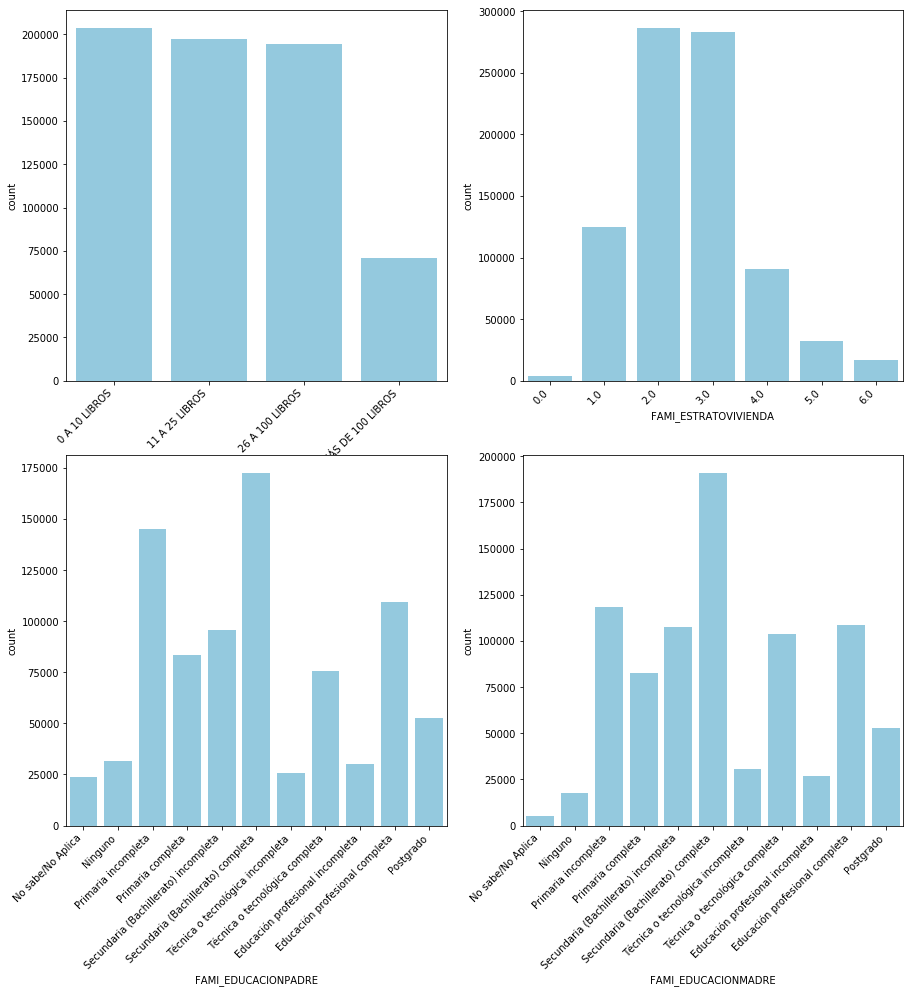

In [12]:
cols, rows = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i,col in enumerate(['FAMI_NUMLIBROS','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',]):
    c_plt = sns.countplot(df_clean[col], color="skyblue", ax=axes[int(i/cols), i%cols])
    c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')

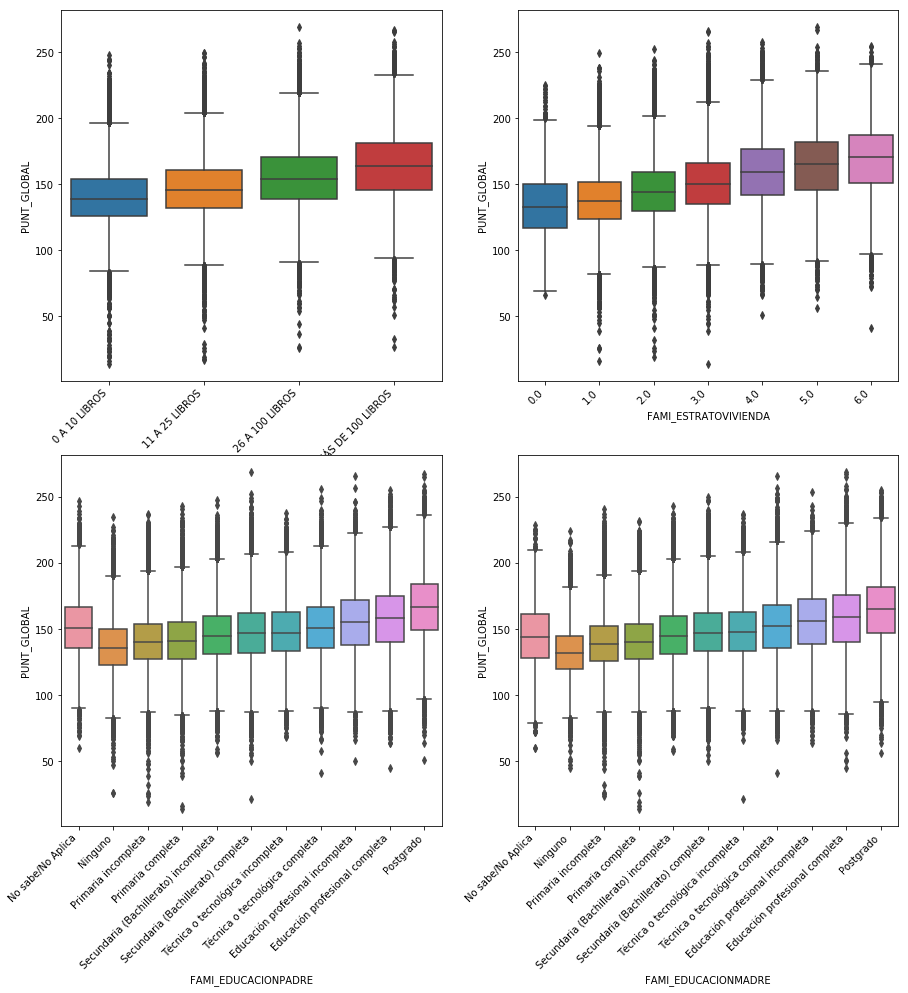

In [13]:
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i,col in enumerate(['FAMI_NUMLIBROS','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',]):
    c_plt = sns.boxplot(x=col,y='PUNT_GLOBAL',data=df_clean, ax=axes[int(i/cols), i%cols])
    c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')

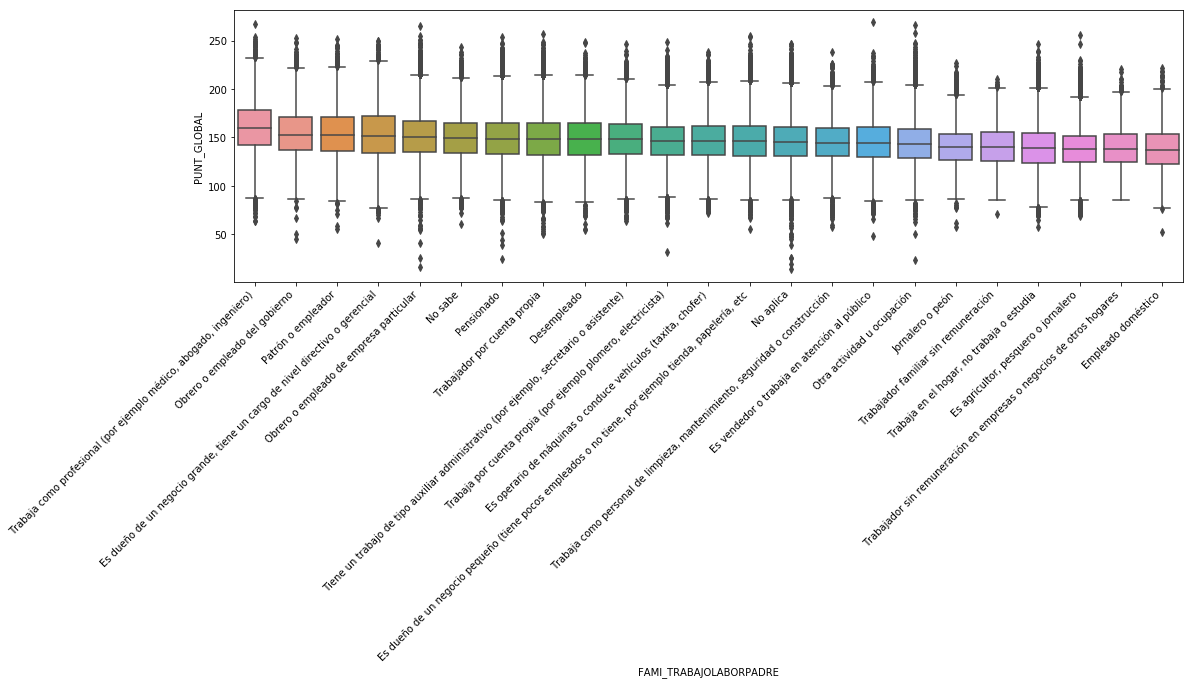

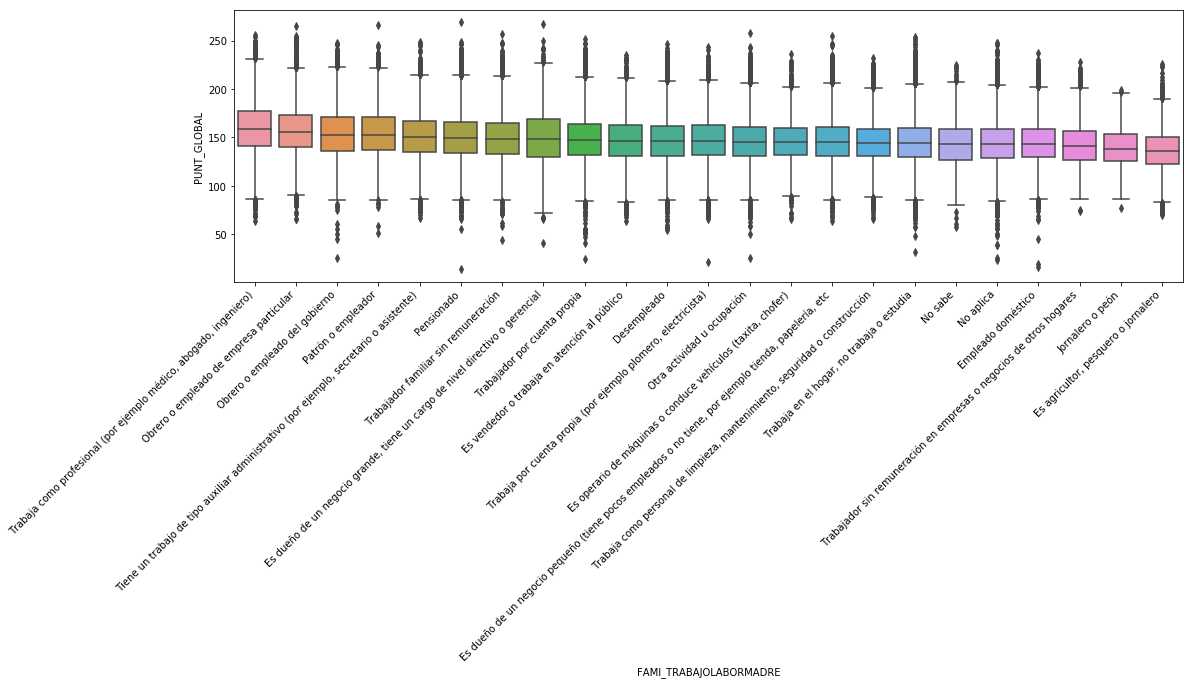

In [14]:
for col in ['FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE']:
    medians = df_clean.groupby(col)['PUNT_GLOBAL'].median()
    medians.sort_values(ascending=False, inplace=True)

    fig, axes = plt.subplots(figsize=(17, 5))
    c_plt = sns.boxplot(x=col,y='PUNT_GLOBAL',data=df_clean,order=medians.index)
    c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)
    plt.show()

## Categoric variables

ESTU_AREARESIDE, ESTU_TITULOOBTENIDOBACHILLER, ESTU_SEMESTRECURSA, ESTU_DEDICACIONLECTURADIARIA, ESTU_DEDICACIONINTERNET, ESTU_PRIVADO_LIBERTAD

In [15]:
cols_cat_1 = ['ESTU_AREARESIDE','ESTU_TITULOOBTENIDOBACHILLER','ESTU_PRIVADO_LIBERTAD']

df_clean[cols_cat_1].isnull().sum()

ESTU_AREARESIDE                 226761
ESTU_TITULOOBTENIDOBACHILLER    199907
ESTU_PRIVADO_LIBERTAD                0
dtype: int64

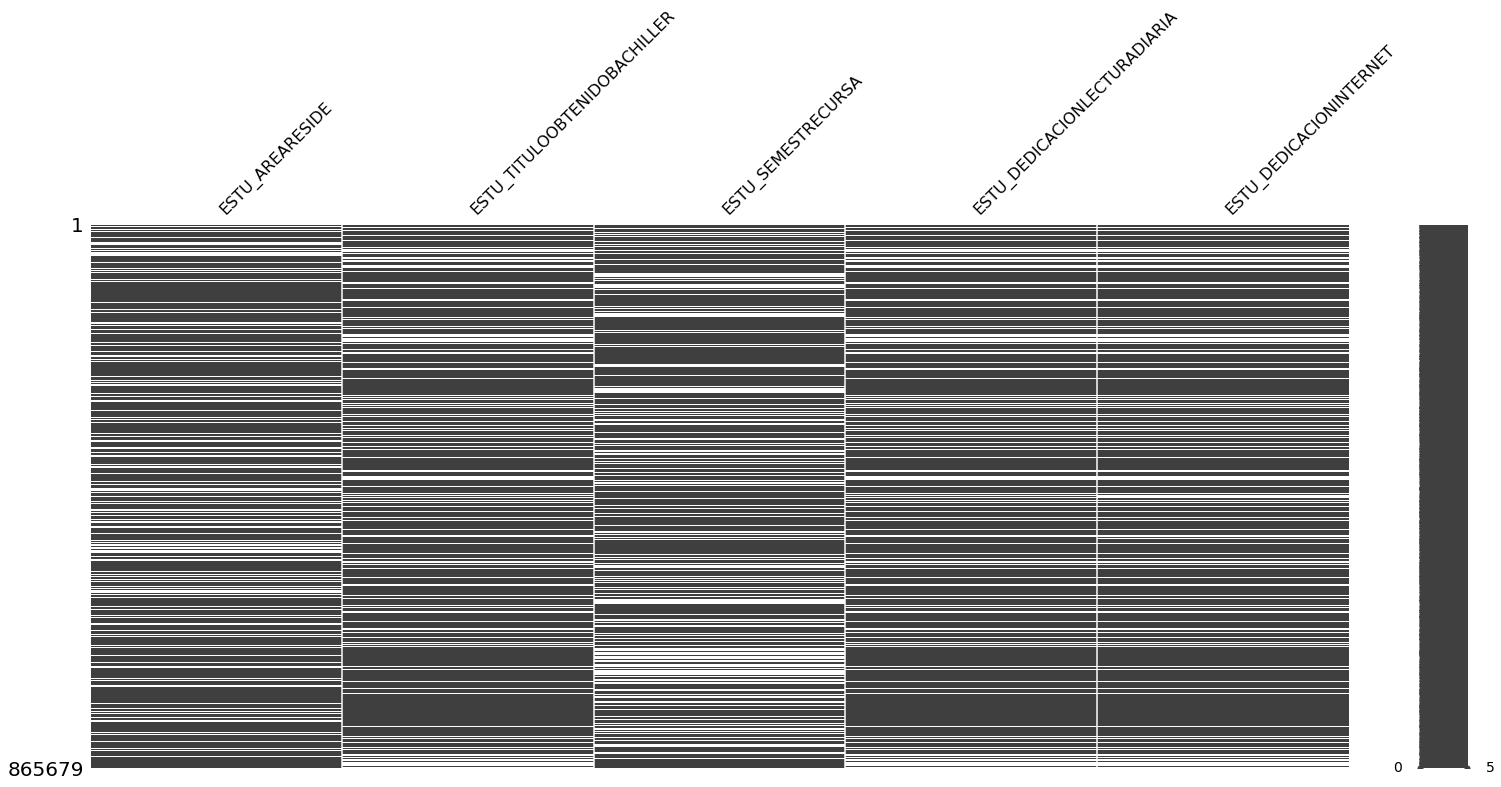

In [17]:
msno.matrix(df_clean[['ESTU_AREARESIDE','ESTU_TITULOOBTENIDOBACHILLER','ESTU_SEMESTRECURSA',
                      'ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET',]])

In [16]:
for col in cols_cat_1:
    print(df_clean[col].value_counts(dropna=False))
    print('-------------------------------------------')

Cabecera Municipal    569982
NaN                   226761
Area Rural             68936
Name: ESTU_AREARESIDE, dtype: int64
-------------------------------------------
Bachiller académico                  491755
NaN                                  199907
Bachiller técnico                    154104
Bachiller pedagógico o normalista     19913
Name: ESTU_TITULOOBTENIDOBACHILLER, dtype: int64
-------------------------------------------
N    865652
S        27
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64
-------------------------------------------


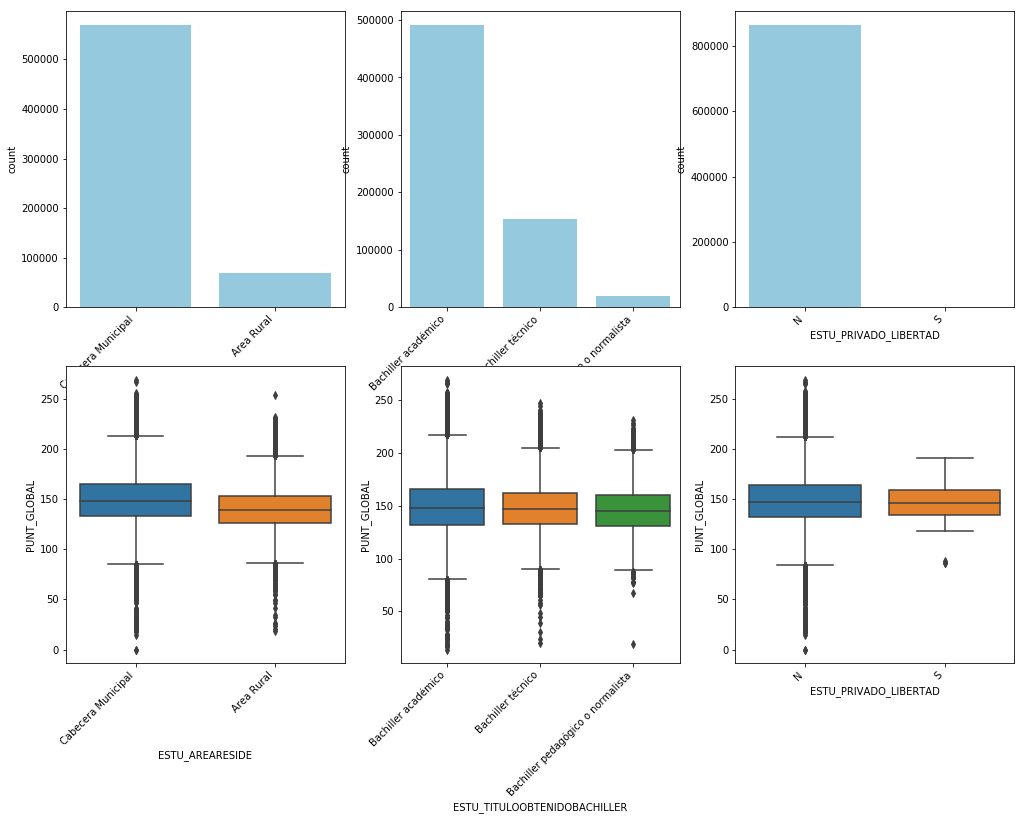

In [17]:
cols, rows = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(17, 12))#, sharex=True
for i,col in enumerate(cols_cat_1):
    c_plt = sns.countplot(df_clean[col], color="skyblue", ax=axes[0,i])
    c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)

for i,col in enumerate(cols_cat_1):
    c_plt = sns.boxplot(x=col,y='PUNT_GLOBAL',data=df_clean, ax=axes[1,i])
    c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)

## Academic variables

In [18]:
cols_cat_2 = ['INST_NOMBRE_INSTITUCION','ESTU_PRGM_ACADEMICO','GRUPOREFERENCIA','ESTU_METODO_PRGM',
              'INST_CARACTER_ACADEMICO','INST_ORIGEN','PAGOMATRICULA']

df_clean[cols_cat_2].isnull().sum()

INST_NOMBRE_INSTITUCION       0
ESTU_PRGM_ACADEMICO           0
GRUPOREFERENCIA               0
ESTU_METODO_PRGM              0
INST_CARACTER_ACADEMICO       0
INST_ORIGEN                   0
PAGOMATRICULA              5430
dtype: int64

In [19]:
for col in cols_cat_2:
    print(len(df_clean[col].unique()))

382
874
21
5
5
6
6


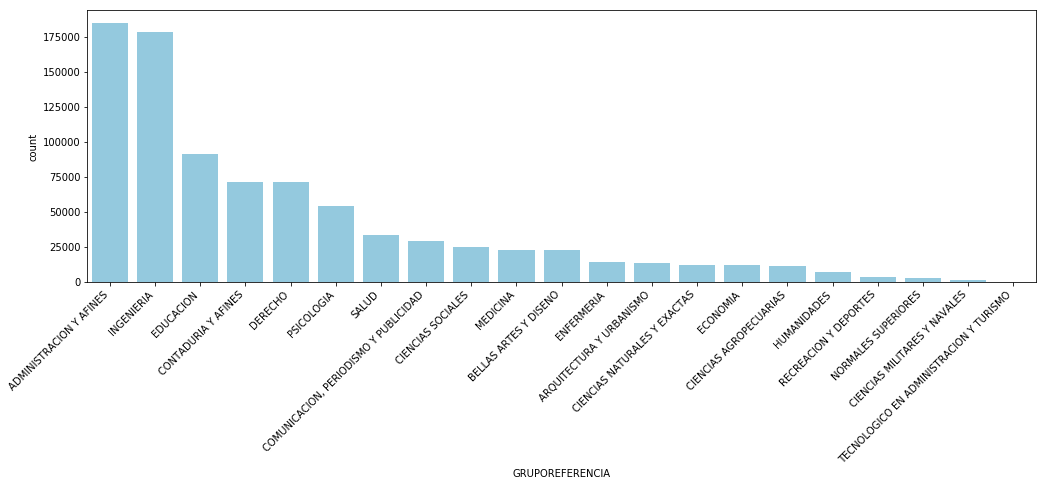

In [20]:
fig, axes = plt.subplots(figsize=(17, 5))
c_plt = sns.countplot(df_clean['GRUPOREFERENCIA'], color="skyblue",
                      order=df_clean['GRUPOREFERENCIA'].value_counts().index)
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45,horizontalalignment='right',)
plt.show()

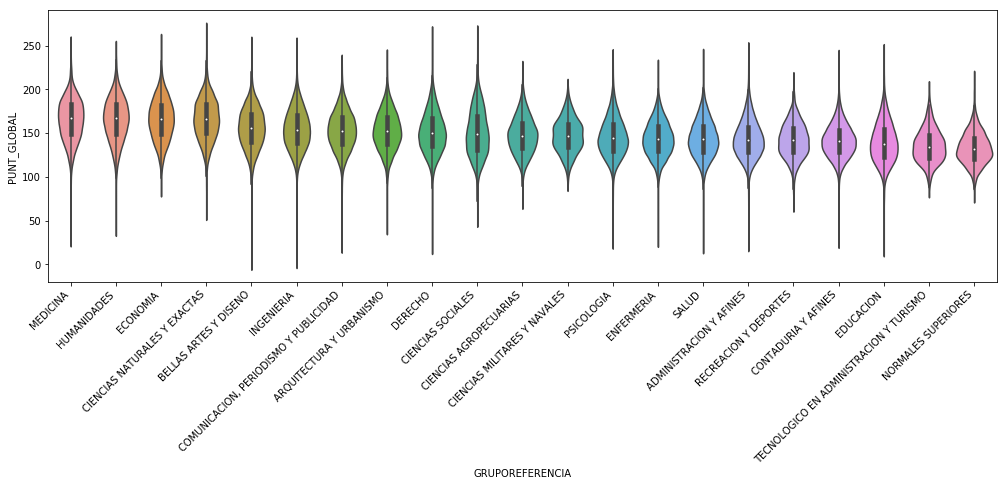

In [21]:
medians = df_clean.groupby('GRUPOREFERENCIA')['PUNT_GLOBAL'].median()
medians.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(figsize=(17, 5))
c_plt = sns.violinplot(x='GRUPOREFERENCIA',y='PUNT_GLOBAL',data=df_clean,
                       order=medians.index)
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)
plt.show()

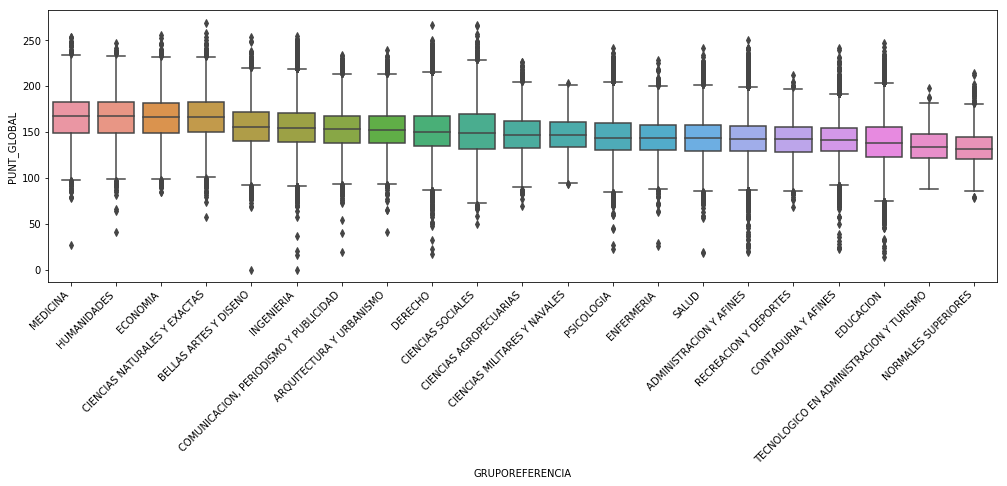

In [22]:
medians = df_clean.groupby('GRUPOREFERENCIA')['PUNT_GLOBAL'].median()
medians.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(figsize=(17, 5))
c_plt = sns.boxplot(x='GRUPOREFERENCIA',y='PUNT_GLOBAL',data=df_clean,
                    order=medians.index)
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)
plt.show()

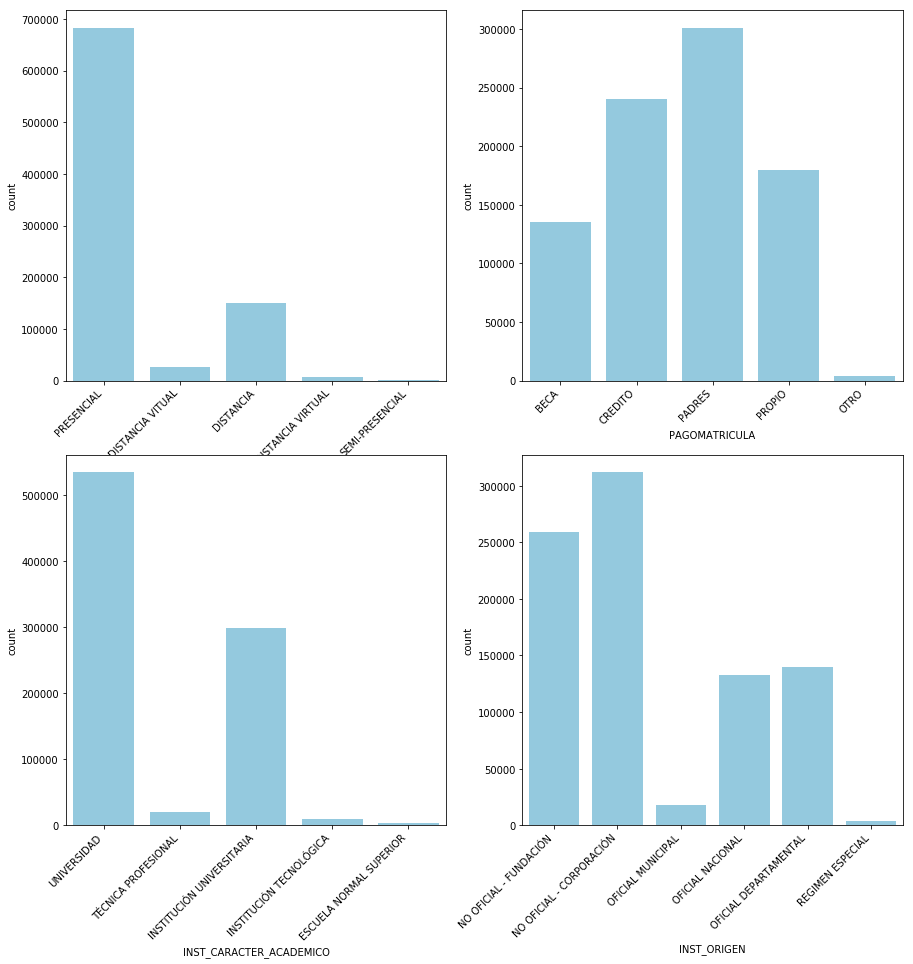

In [23]:
cols, rows = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i,col in enumerate(['ESTU_METODO_PRGM','PAGOMATRICULA','INST_CARACTER_ACADEMICO','INST_ORIGEN',]):
    c_plt = sns.countplot(df_clean[col], color="skyblue", ax=axes[int(i/cols), i%cols])
    c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')

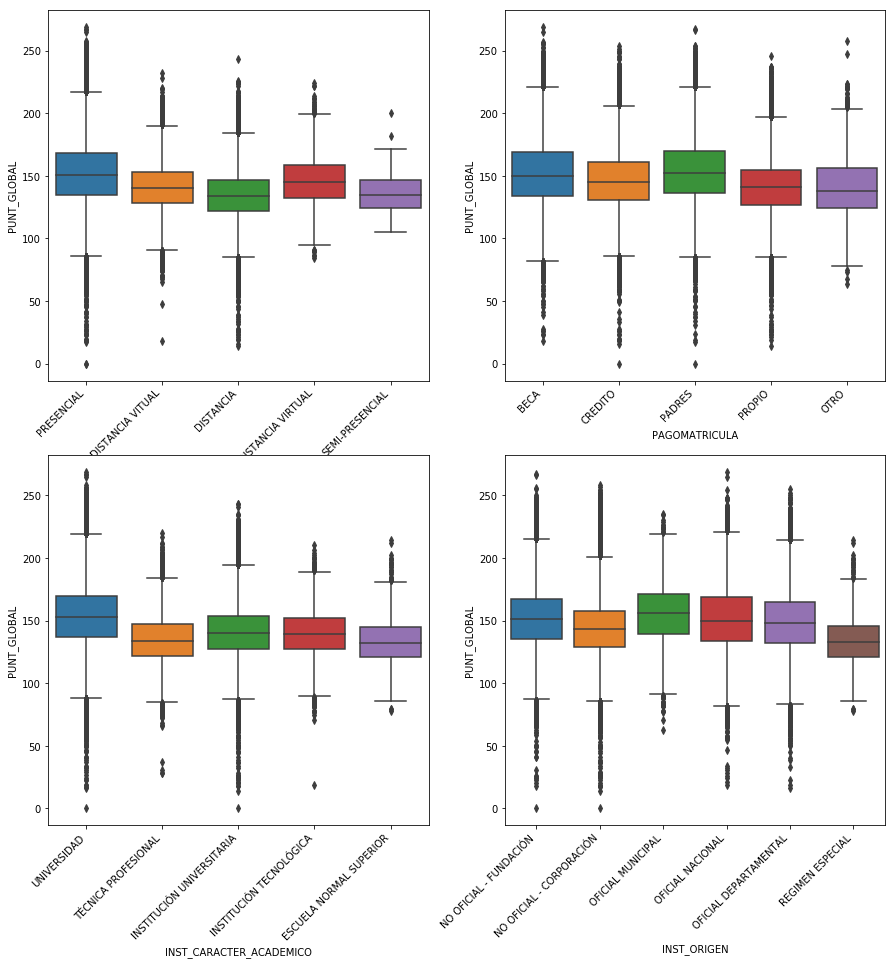

In [24]:
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i,col in enumerate(['ESTU_METODO_PRGM','PAGOMATRICULA','INST_CARACTER_ACADEMICO','INST_ORIGEN',]):
    c_plt = sns.boxplot(x=col,y='PUNT_GLOBAL',data=df_clean, ax=axes[int(i/cols), i%cols])
    c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')

In [25]:
df_clean['INST_ORIGEN'].value_counts(dropna=False)

NO OFICIAL - CORPORACIÓN    311833
NO OFICIAL - FUNDACIÓN      259005
OFICIAL DEPARTAMENTAL       140137
OFICIAL NACIONAL            132970
OFICIAL MUNICIPAL            18297
REGIMEN ESPECIAL              3437
Name: INST_ORIGEN, dtype: int64

In [26]:
df_clean['CARACTER'] = 'PUBLICA'
df_clean.loc[df_clean['INST_ORIGEN'].str.contains('NO OFICIAL'),'CARACTER'] = 'PRIVADA'
df_clean.loc[df_clean['INST_ORIGEN']=='REGIMEN ESPECIAL','CARACTER'] = 'REGIMEN ESPECIAL'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
df_clean['INST_NOMBRE_INSTITUCION'].value_counts()

CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÁ D.C.                                 58896
POLITECNICO GRANCOLOMBIANO-BOGOTÁ D.C.                                                          27973
UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD-BOGOTÁ D.C.                                     21896
UNIVERSIDAD COOPERATIVA DE COLOMBIA-BOGOTÁ D.C.                                                 18054
FUNDACION UNIVERSITARIA DEL AREA ANDINA-BOGOTÁ D.C.                                             15414
UNIVERSIDAD DE ANTIOQUIA-MEDELLIN                                                               14801
CORPORACION UNIFICADA NACIONAL DE EDUCACION SUPERIOR-CUN-BOGOTÁ D.C.                            14355
UNIVERSIDAD DEL TOLIMA-IBAGUE                                                                   13088
CORPORACION UNIVERSITARIA REMINGTON-MEDELLIN                                                    12739
UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.                                      

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

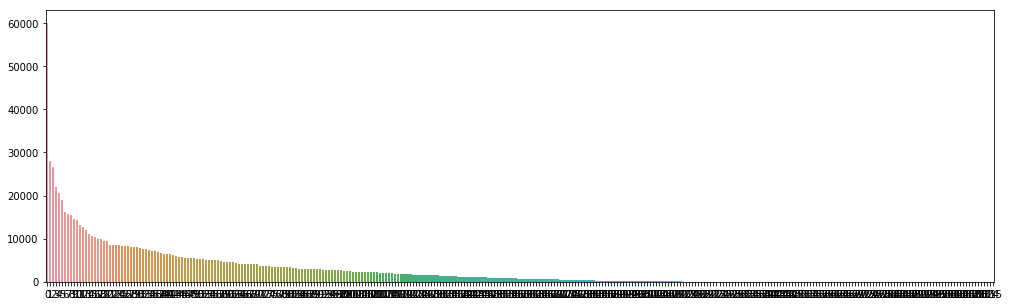

In [28]:
df_clean['INST_NOMBRE_INSTITUCION'] = df_clean['INST_NOMBRE_INSTITUCION'].apply(lambda x: x.replace('"',''))
df_clean['INST_NOMBRE_INSTITUCION'] = df_clean['INST_NOMBRE_INSTITUCION'].apply(lambda x: x.replace("'",''))
df_clean['INST_NOMBRE_INSTITUCION'] = df_clean['INST_NOMBRE_INSTITUCION'].apply(lambda x: x.split('-')[0].strip())

fig, axes = plt.subplots(figsize=(17, 5))
hist_inst = list(df_clean['INST_NOMBRE_INSTITUCION'].value_counts())
sns.barplot(np.arange(len(hist_inst)),hist_inst)
plt.show()

In [29]:
p_info_inst = 0.2 #Percentage of selected categories
n_cat = int(len(hist_inst)*p_info_inst)
print('Number of main categories: ',n_cat)
print('% info: ',np.sum(hist_inst[:n_cat])/df_clean.shape[0])

Number of main categories:  63
% info:  0.730752392053


In [30]:
list(df_clean['INST_NOMBRE_INSTITUCION'].value_counts().index)[:n_cat]

['CORPORACION UNIVERSITARIA MINUTO DE DIOS',
 'POLITECNICO GRANCOLOMBIANO',
 'UNIVERSIDAD COOPERATIVA DE COLOMBIA',
 'UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD',
 'UNIVERSIDAD NACIONAL DE COLOMBIA',
 'FUNDACION UNIVERSITARIA DEL AREA ANDINA',
 'UNIVERSIDAD LIBRE',
 'UNIVERSIDAD DE ANTIOQUIA',
 'UNIVERSIDAD SANTO TOMAS',
 'PONTIFICIA UNIVERSIDAD JAVERIANA',
 'CORPORACION UNIFICADA NACIONAL DE EDUCACION SUPERIOR',
 'UNIVERSIDAD DEL TOLIMA',
 'CORPORACION UNIVERSITARIA REMINGTON',
 'UNIVERSIDAD PONTIFICIA BOLIVARIANA',
 'UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMBIA',
 'UNIVERSIDAD DEL ATLANTICO',
 'UNIVERSIDAD DE PAMPLONA',
 'UNIVERSIDAD DEL QUINDIO',
 'UNIVERSIDAD FRANCISCO DE PAULA SANTANDER',
 'UNIVERSIDAD DE LOS ANDES',
 'UNIVERSIDAD DEL VALLE',
 'UNIVERSIDAD ANTONIO NARIÑO',
 'UNIVERSIDAD DE CARTAGENA',
 'UNIVERSIDAD DE SAN BUENAVENTURA',
 'CORPORACION UNIVERSITARIA IBEROAMERICANA',
 'UNIVERSIDAD SIMON BOLIVAR',
 'UNIVERSIDAD INDUSTRIAL DE SANTANDER',
 'UNIVERSIDAD DE LA SA

# Ordinal variables

In [28]:
cols_ord_1 = ['ESTU_DEDICACIONINTERNET','ESTU_SEMESTRECURSA','YEAR',
              'ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_DEDICACIONLECTURADIARIA','ESTU_HORASSEMANATRABAJA',]

df_clean[cols_ord_1].isnull().sum()

ESTU_DEDICACIONINTERNET           200406
ESTU_SEMESTRECURSA                230023
YEAR                                   0
ESTU_VALORMATRICULAUNIVERSIDAD         0
ESTU_DEDICACIONLECTURADIARIA      199251
ESTU_HORASSEMANATRABAJA            14817
dtype: int64

In [29]:
df_clean.loc[df_clean['ESTU_VALORMATRICULAUNIVERSIDAD']=="['Entre 1 millón y menos de 2.5 millones']",
             'ESTU_VALORMATRICULAUNIVERSIDAD'] = 'Entre 1 millón y menos de 2.5 millones'

df_clean.loc[df_clean['ESTU_VALORMATRICULAUNIVERSIDAD']=='Más de 7 millones',
             'ESTU_VALORMATRICULAUNIVERSIDAD'] = 'Mas de 7 millones'

for col in cols_ord_1:
    print(df_clean[col].value_counts(dropna=False))
    print('---------------------------------------------------')

Entre 1 y 3 horas    375034
NaN                  200406
Menos de una hora    168488
Más de 4 horas       121751
Name: ESTU_DEDICACIONINTERNET, dtype: int64
---------------------------------------------------
NaN      230023
 10.0    213366
 9.0     213240
 8.0     123508
 7.0      35501
 11.0     24673
 12.0     13938
 6.0       4895
 4.0       3323
 5.0       2108
 3.0        704
 2.0        284
 1.0        116
Name: ESTU_SEMESTRECURSA, dtype: int64
---------------------------------------------------
2016    227970
2017    222136
2018    218053
2019    197520
Name: YEAR, dtype: int64
---------------------------------------------------
Entre 1 millón y menos de 2.5 millones      263110
Entre 2.5 millones y menos de 4 millones    169552
Menos de 500 mil                            122390
Entre 500 mil y menos de 1 millón           110341
Entre 4 millones y menos de 5.5 millones     81683
Mas de 7 millones                            68734
Entre 5.5 millones y menos de 7 millones     42385

In [30]:
df_clean['ESTU_VALORMATRICULAUNIVERSIDAD'] = pd.Categorical(df_clean['ESTU_VALORMATRICULAUNIVERSIDAD'],ordered=True,
               categories=['No pagó matrícula','Menos de 500 mil','Entre 500 mil y menos de 1 millón',
                           'Entre 1 millón y menos de 2.5 millones','Entre 2.5 millones y menos de 4 millones',
                           'Entre 4 millones y menos de 5.5 millones','Entre 5.5 millones y menos de 7 millones',
                           'Mas de 7 millones'])

df_clean['ESTU_HORASSEMANATRABAJA'] = pd.Categorical(df_clean['ESTU_HORASSEMANATRABAJA'],ordered=True,
               categories=['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas',
                           'Más de 30 horas',])

#df_clean['YEAR'] = pd.Categorical(df_clean['YEAR'],ordered=True,categories=[2016,2017,2018,2019])

df_clean['ESTU_DEDICACIONLECTURADIARIA'] = pd.Categorical(df_clean['ESTU_DEDICACIONLECTURADIARIA'],ordered=True,
                categories=['No leo por entretenimiento','30 minutos o menos','Entre 30 y 60 minutos',
                            'Entre 1 y 2 horas','Más de 2 horas'])

df_clean['ESTU_DEDICACIONINTERNET'] = pd.Categorical(df_clean['ESTU_DEDICACIONINTERNET'],ordered=True,
                categories=['Menos de una hora','Entre 1 y 3 horas','Más de 4 horas',])

df_clean['ESTU_SEMESTRECURSA'] = pd.Categorical(df_clean['ESTU_SEMESTRECURSA'],ordered=True,
                                                categories=[1.0,2.0,3.0,4.0,5.0,6.0,
                                                            7.0,8.0,9.0,10.0,11.0,12.0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

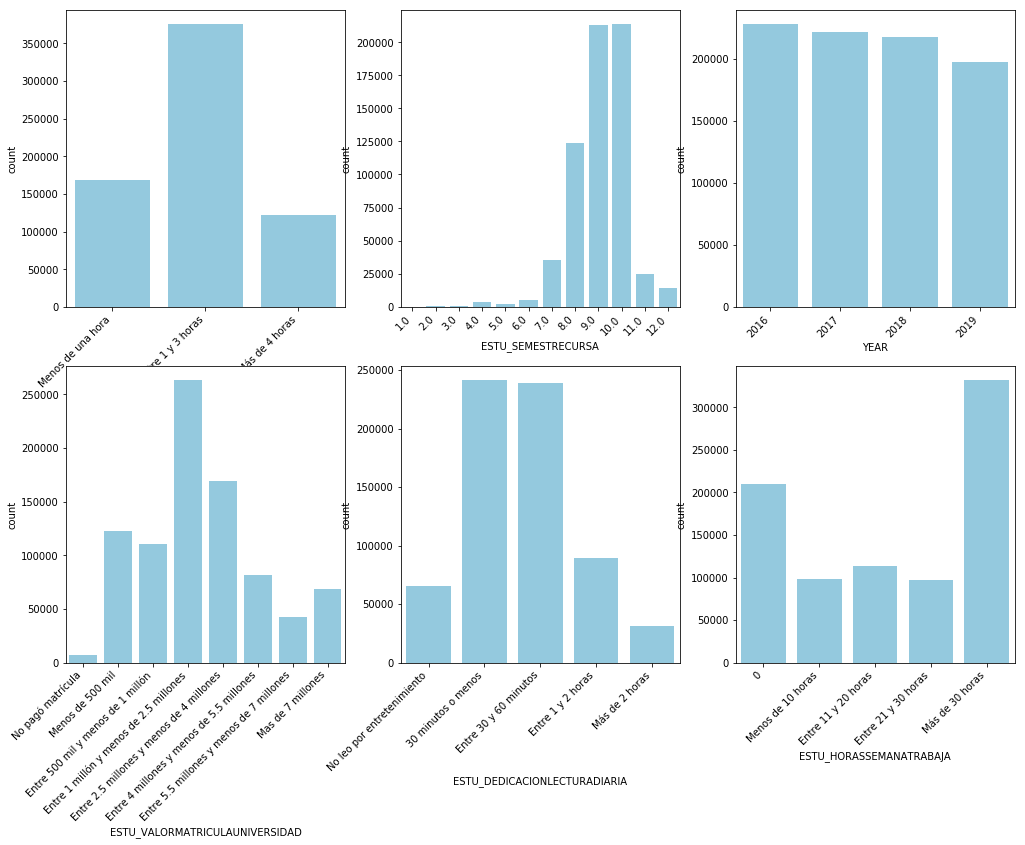

In [31]:
cols, rows = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(17, 12))
for i,col in enumerate(cols_ord_1):
    c_plt = sns.countplot(df_clean[col], color="skyblue", ax=axes[int(i/cols), i%cols])
    c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')

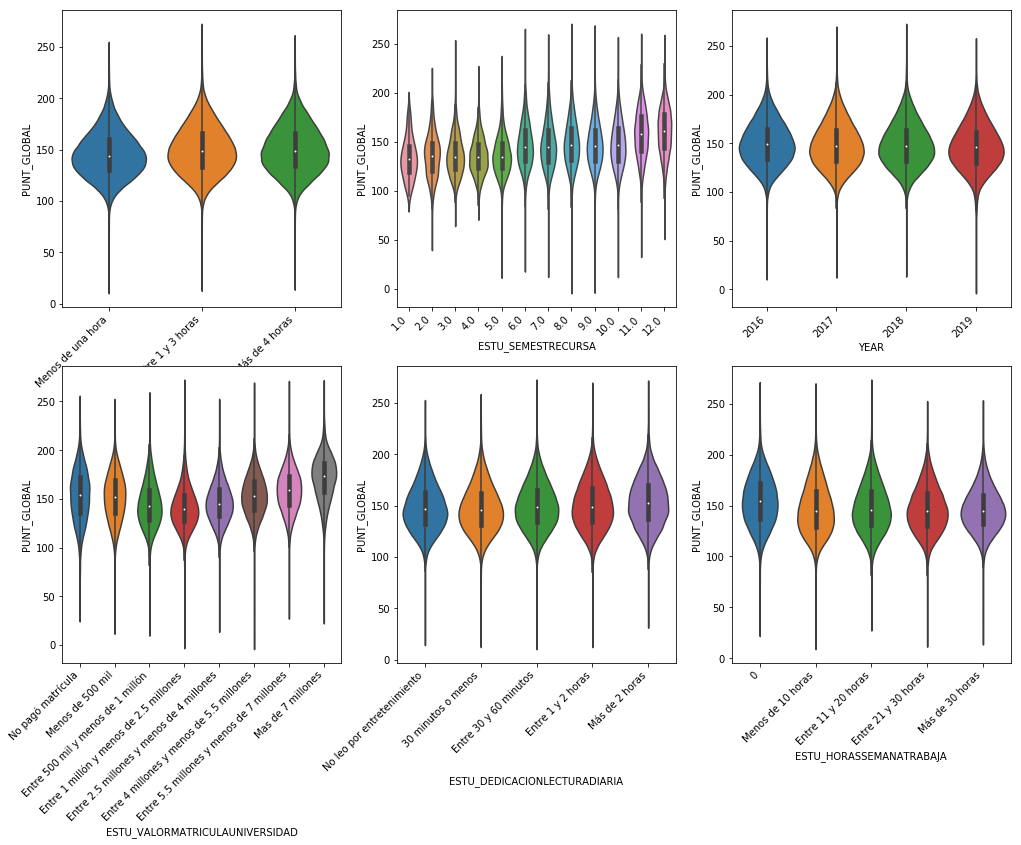

In [32]:
fig, axes = plt.subplots(rows, cols, figsize=(17, 12))
for i,col in enumerate(cols_ord_1):
    c_plt = sns.violinplot(x=col,y='PUNT_GLOBAL',data=df_clean, ax=axes[int(i/cols), i%cols])
    c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')

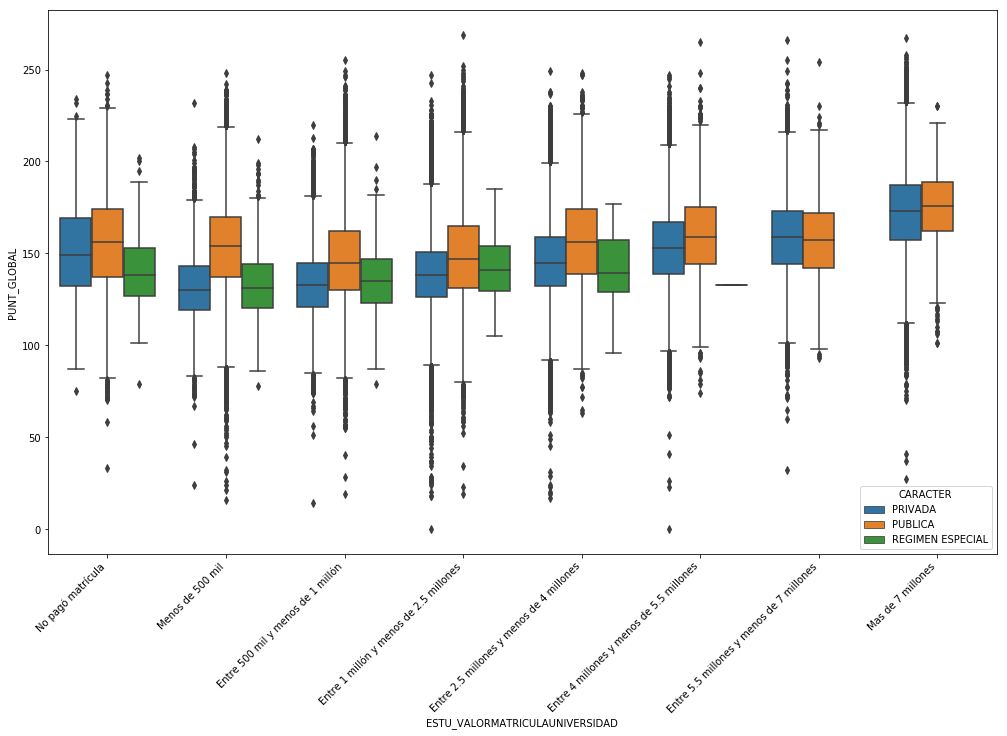

In [33]:
fig, axes = plt.subplots(figsize=(17, 10))
c_plt = sns.boxplot(x='ESTU_VALORMATRICULAUNIVERSIDAD',y='PUNT_GLOBAL',hue='CARACTER',data=df_clean)
c_plt.set_xticklabels(c_plt.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

## Numeric variables

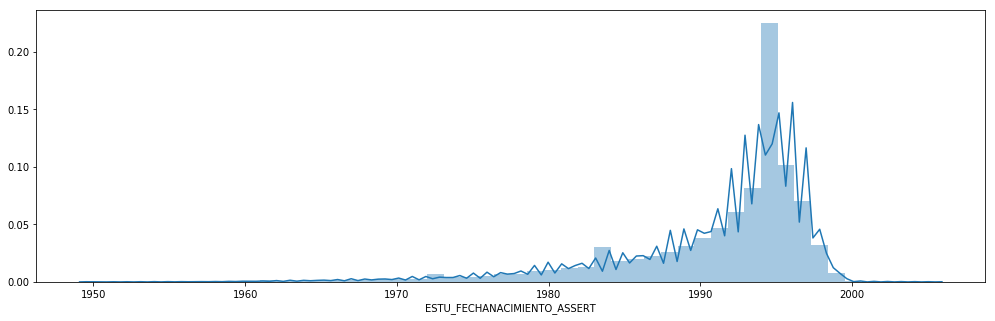

In [34]:
fig, axes = plt.subplots(figsize=(17, 5))
sns.distplot(pd.to_datetime(df_clean['ESTU_FECHANACIMIENTO_ASSERT'].fillna('06/11/1950'),format='%m/%d/%Y').dt.year,)
plt.show()

In [35]:
df_clean['AGE_APROX'] = df_clean['YEAR'] - pd.to_datetime(df_clean['ESTU_FECHANACIMIENTO_ASSERT'],format='%m/%d/%Y').dt.year
cols_num_1 = ['FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR','ESTU_INSE_INDIVIDUAL','AGE_APROX']

df_clean[cols_num_1].isnull().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


FAMI_PERSONASHOGAR      199251
FAMI_CUARTOSHOGAR       199251
ESTU_INSE_INDIVIDUAL     34204
AGE_APROX                   77
dtype: int64

In [36]:
for col in cols_num_1:
    print(df_clean[col].describe())

count    666428.000000
mean          3.881204
std           1.523341
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          12.000000
Name: FAMI_PERSONASHOGAR, dtype: float64
count    666428.000000
mean          2.765984
std           1.046780
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          10.000000
Name: FAMI_CUARTOSHOGAR, dtype: float64
count    831475.000000
mean         51.976623
std          10.532904
min          13.877553
25%          44.708389
50%          51.005948
75%          58.463086
max          91.480238
Name: ESTU_INSE_INDIVIDUAL, dtype: float64
count    865602.000000
mean         26.345881
std           6.415490
min          11.000000
25%          22.000000
50%          24.000000
75%          28.000000
max          69.000000
Name: AGE_APROX, dtype: float64


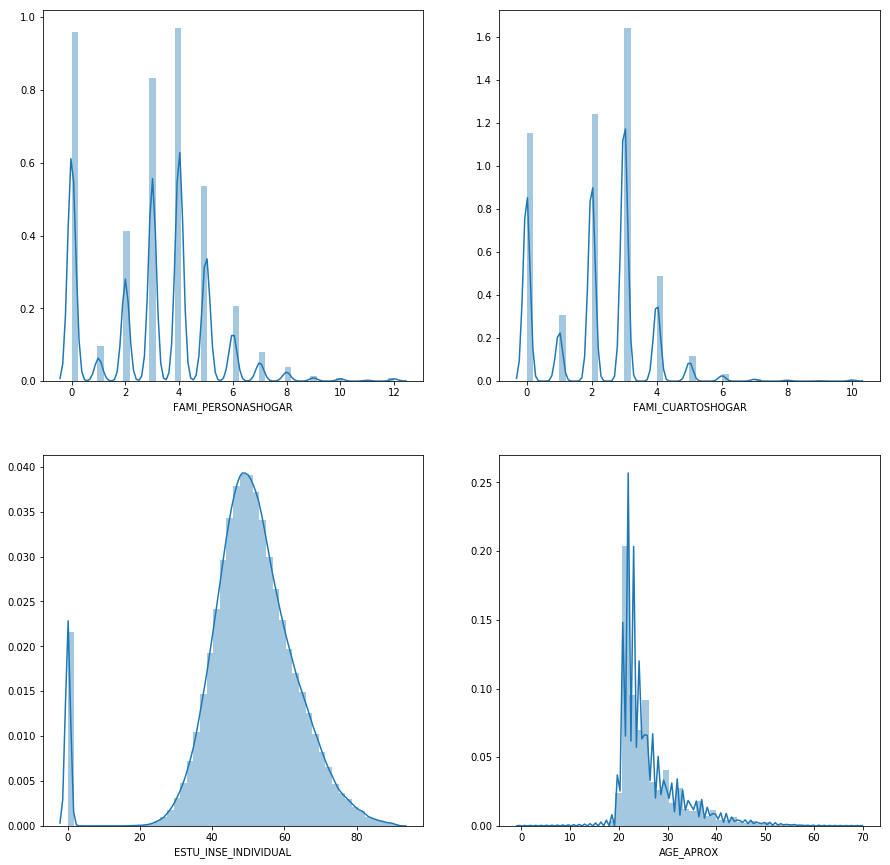

In [37]:
cols, rows = 2, 2
fig, axes = plt.subplots(cols, rows, figsize=(15, 15))
for i,col in enumerate(cols_num_1):
    sns.distplot(df_clean[col].fillna(0), ax=axes[int(i/cols), i%cols])

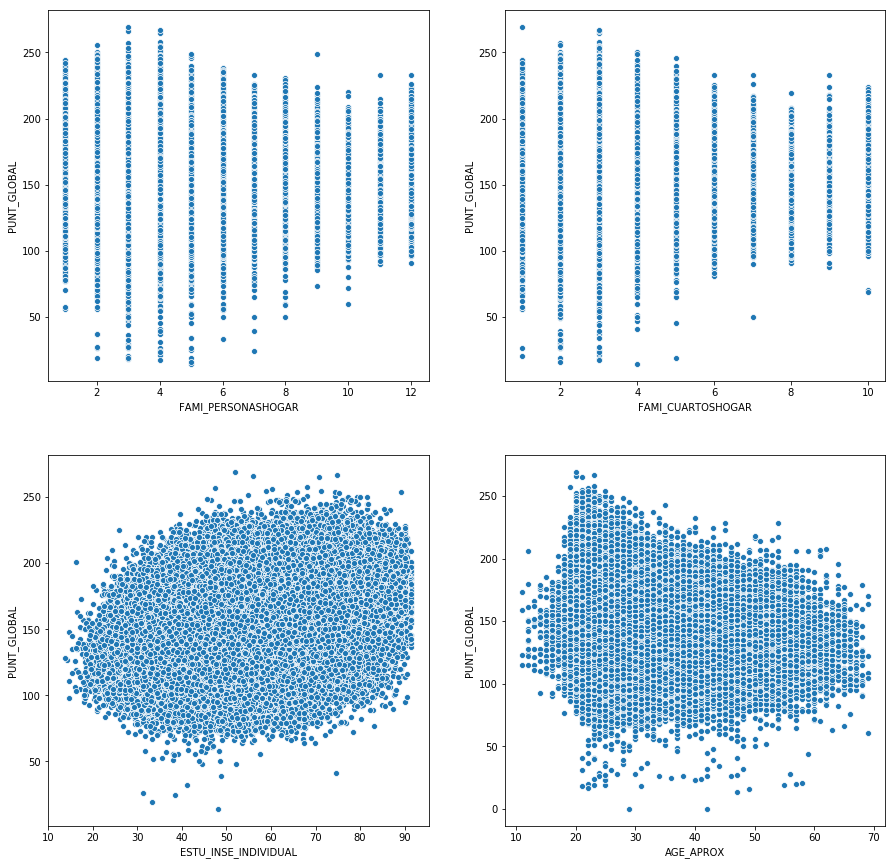

In [38]:
fig, axes = plt.subplots(cols, rows, figsize=(15, 15))
for i,col in enumerate(cols_num_1):
    sns.scatterplot(x=col, y='PUNT_GLOBAL', data=df_clean, ax=axes[int(i/cols), i%cols])
plt.show()

In [39]:
corr = df_clean[cols_num_1+cols_vio+['PUNT_GLOBAL','TASA_HOMICIDIOS_4_LOG','TASA_HOMICIDIOS_1_LOG',]].corr()
corr.style.background_gradient().set_precision(2)

# Basic variables

In [40]:
cols_cat_3 = ['ESTU_TIPODOCUMENTO','ESTU_GENERO','ESTU_EXTERIOR',]

In [41]:
for col in cols_cat_3:
    print(df_clean[col].value_counts(dropna=False))
    print('---------------------------------------------------')

CC     861880
CE       1457
CR       1268
TI        801
PE        216
PC         52
PEP         3
NES         2
Name: ESTU_TIPODOCUMENTO, dtype: int64
---------------------------------------------------
F      514636
M      351022
NaN        21
Name: ESTU_GENERO, dtype: int64
---------------------------------------------------
NO    863221
SI      2458
Name: ESTU_EXTERIOR, dtype: int64
---------------------------------------------------


In [42]:
df_clean.loc[df_clean['ESTU_TIPODOCUMENTO'].isin(['PEP','NES']),'ESTU_TIPODOCUMENTO'] = 'CR'
df_clean.loc[df_clean['ESTU_TIPODOCUMENTO'].isin(['PC',]),'ESTU_TIPODOCUMENTO'] = 'CC'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


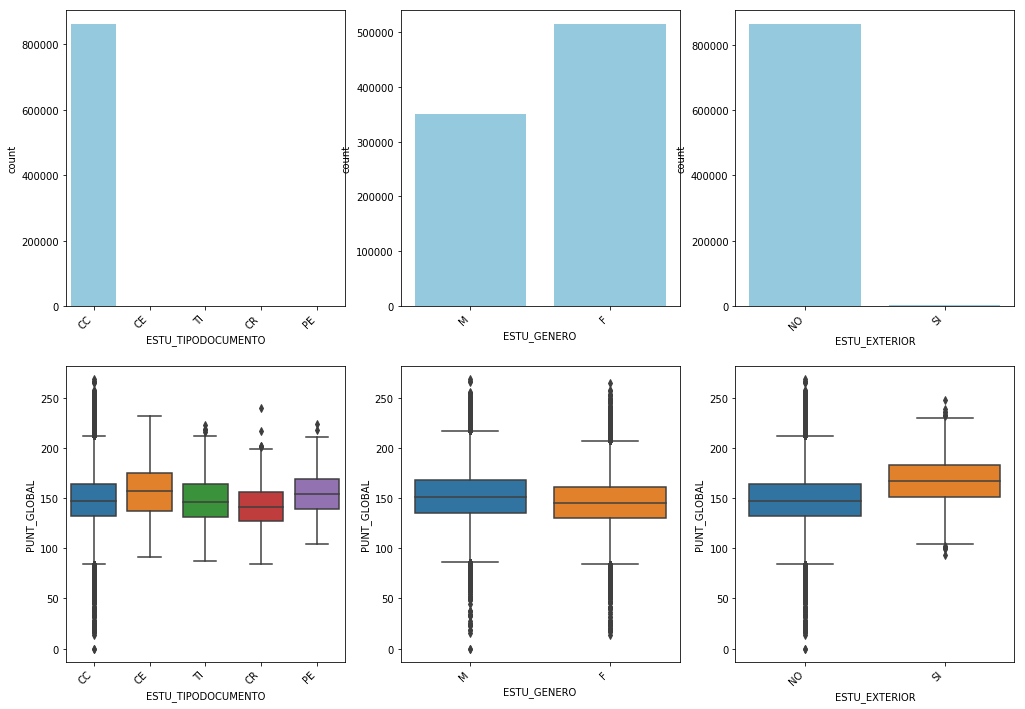

In [43]:
cols, rows = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(17, 12))
for i,col in enumerate(cols_cat_3):
    c_plt = sns.countplot(df_clean[col], color="skyblue", ax=axes[0,i])
    c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)

for i,col in enumerate(cols_cat_3):
    c_plt = sns.boxplot(x=col,y='PUNT_GLOBAL',data=df_clean, ax=axes[1,i])
    c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)

In [44]:
s = df_clean['ESTU_NACIONALIDAD'].value_counts()
df_clean['ESTU_NACIONALIDAD'] = np.where(df_clean['ESTU_NACIONALIDAD'].isin(s.index[s > 50]), df_clean['ESTU_NACIONALIDAD'], 'OTROS')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


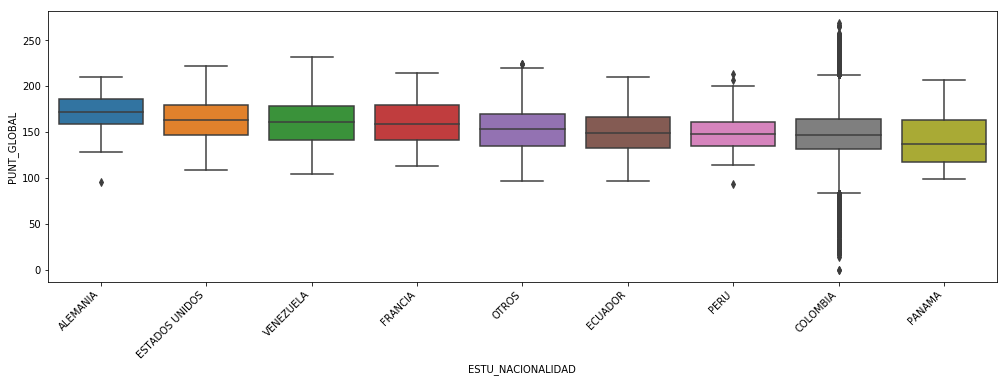

In [45]:
medians = df_clean.groupby('ESTU_NACIONALIDAD')['PUNT_GLOBAL'].median()
medians.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(figsize=(17, 5))
c_plt = sns.boxplot(x='ESTU_NACIONALIDAD',y='PUNT_GLOBAL',data=df_clean,order=medians.index)
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)
plt.show()

In [46]:
df_clean.groupby('ESTU_NACIONALIDAD')["PUNT_GLOBAL"].describe().sort_values(by="mean",ascending=False)

count        mean        std    min     25%    50%  \
ESTU_NACIONALIDAD                                                          
ALEMANIA               54.0  171.796296  21.136019   96.0  159.25  172.0   
ESTADOS UNIDOS        171.0  163.181287  23.284605  109.0  146.50  163.0   
VENEZUELA             608.0  160.976974  23.827762  104.0  142.00  161.0   
FRANCIA               138.0  159.884058  23.921121  113.0  142.00  158.5   
OTROS                 590.0  154.135593  25.179328   97.0  135.00  153.5   
PERU                   67.0  150.567164  23.418604   94.0  135.50  148.0   
ECUADOR               113.0  149.752212  22.686344   97.0  133.00  149.0   
COLOMBIA           863883.0  148.590612  23.140120    0.0  132.00  147.0   
PANAMA                 55.0  142.636364  27.263708   99.0  118.00  137.0   

                      75%    max  
ESTU_NACIONALIDAD                 
ALEMANIA           186.00  210.0  
ESTADOS UNIDOS     180.00  222.0  
VENEZUELA          178.25  232.0  
FRANCIA            179.75  215.0  
OTROS              170.00  224.0  
PERU               161.50  213.0  
ECUADOR            167.00  210.0  
COLOMBIA           164.00  269.0  
PANAMA             163.00  207.0

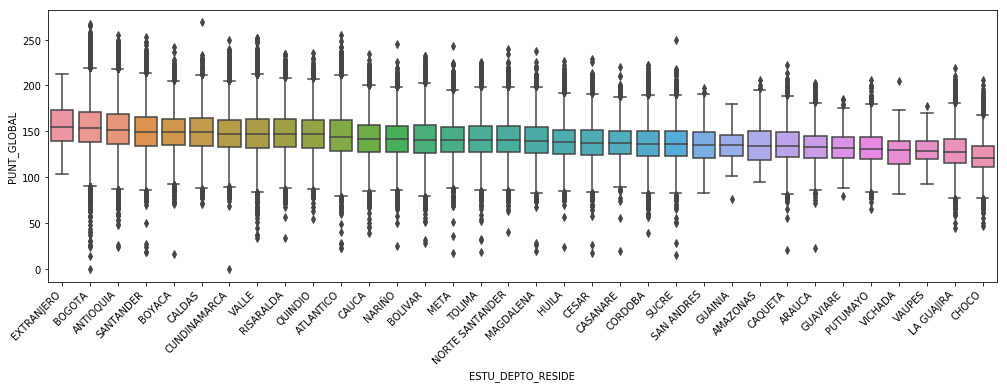

In [47]:
medians = df_clean.groupby('ESTU_DEPTO_RESIDE')['PUNT_GLOBAL'].median()
medians.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(figsize=(17, 5))
c_plt = sns.boxplot(x='ESTU_DEPTO_RESIDE',y='PUNT_GLOBAL',data=df_clean,order=medians.index)
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)
plt.show()

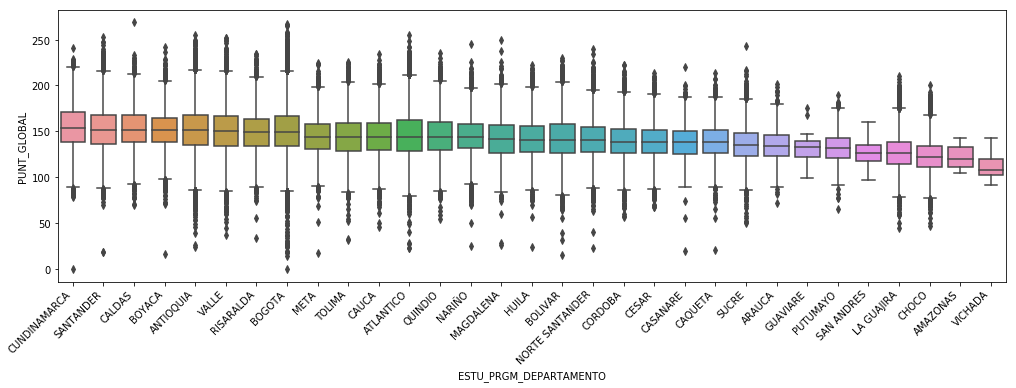

In [48]:
medians = df_clean.groupby('ESTU_PRGM_DEPARTAMENTO')['PUNT_GLOBAL'].median()
medians.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(figsize=(17, 5))
c_plt = sns.boxplot(x='ESTU_PRGM_DEPARTAMENTO',y='PUNT_GLOBAL',data=df_clean,order=medians.index)
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=45, horizontalalignment='right',)
plt.show()

## Target Variable

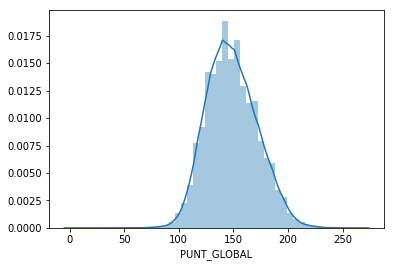

In [49]:
sns.distplot(df_clean['PUNT_GLOBAL'])

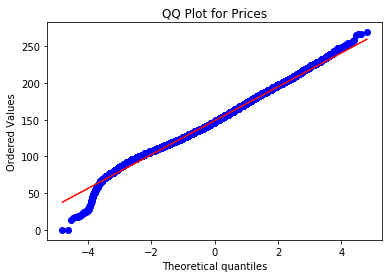

In [50]:
stats.probplot(x=df_clean['PUNT_GLOBAL'], dist = "norm", plot = plt)
plt.title("QQ Plot for Prices")
plt.show()

## Cramér's V Matrix

Looking for association between categorical variables

In [51]:
list_sel = ['ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_DEPTO_RESIDE','ESTU_PRGM_DEPARTAMENTO','ESTU_AREARESIDE',
            'ESTU_EXTERIOR','ESTU_PRGM_ACADEMICO','GRUPOREFERENCIA','INST_NOMBRE_INSTITUCION',
            'ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','INST_ORIGEN',
            'PAGOMATRICULA','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_SEMESTRECURSA',
            'ESTU_DEDICACIONINTERNET','ESTU_DEDICACIONLECTURADIARIA','ESTU_HORASSEMANATRABAJA','FAMI_NUMLIBROS',
            'FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE',
            'FAMI_ESTRATOVIVIENDA',]

corr_k = df_clean[list_sel].corr()

for i in (list_sel):
    for j in (list_sel):
        corr_k.loc[i,j] = funcs.cramers_v(df_clean[i],df_clean[j])

corr_k.style.background_gradient().set_precision(2)

/home/jovyan/work/ZettaNet/src/funcs.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


# Important findings

We looked to the most relevant feature to construct the model:
* ESTU_AREARESIDE: Students for rural areas have lower scores than those from urban areas.
* GRUPOREFERENCIA: The score is influenced by the study area
* ESTU_METODO_PRGM: There is better performance for in-person programs than for virtual ones.
* PAGOMATRICULA: The money source for payment seems to have importance, being that parents, scholarship, and credit obtain higher scores. It makes sense since these sources allows more dedication for studying.
* INST_CARACTER_ACADEMICO: Formal universities with well stablished programs achieve better results.
* ESTU_DEDICACIONINTERNET: It looks like the extremes: high-use or low-use have difference in score (albeit low)
* ESTU_SEMESTRECURSA: It looks like semester presentation has importance in the score achieved. The higher the semester, the higher the score achieved. It makes sense, however, this variable should be reviewed because the saber-pro test is normally presented from the seventh semester.
* ESTU_VALORMATRICULAUNIVERSIDAD: Best scores are associated with both, low-fee programs (public universities) and high-fee programs (high quality universities). Mid-fee programs probably correspond to private universities with regular quality.
* ESTU_DEDICACIONLECTURADIARIA: The more time the student spends reading, the higher he/she scores.
* ESTU_HORASSEMANATRABAJA: On the contrary, the more time the student works, the lower he/she scores.
* ESTU_INSE_INDIVIDUAL: There is a positive correlation betweeen score and socio-economic index.

-These affirmations are based on the boxplot/violinplots and the average by category for every variable.

# Model - Linear Regression

A linear regressor is constructed as a first approach to understand the variables and their relation with the target variable. The linear regression models the PUNT_GLOBAL (global score) according to the others variables.

In [50]:
list_feat = ['ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE',
             'ESTU_EXTERIOR','GRUPOREFERENCIA','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO',
             'PAGOMATRICULA','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_SEMESTRECURSA',
             'ESTU_DEDICACIONINTERNET','ESTU_DEDICACIONLECTURADIARIA','ESTU_HORASSEMANATRABAJA','FAMI_NUMLIBROS',
             'FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE',
             'FAMI_PERSONASHOGAR','ESTU_INSE_INDIVIDUAL','AGE_APROX',
             'TASA_HOMICIDIOS_4_LOG','TASA_HOMICIDIOS_1_LOG']

df_clean[list_feat].dtypes

ESTU_NACIONALIDAD                   object
ESTU_GENERO                         object
ESTU_DEPTO_RESIDE                   object
ESTU_AREARESIDE                     object
ESTU_EXTERIOR                       object
GRUPOREFERENCIA                     object
ESTU_METODO_PRGM                    object
INST_CARACTER_ACADEMICO             object
PAGOMATRICULA                       object
ESTU_VALORMATRICULAUNIVERSIDAD    category
ESTU_SEMESTRECURSA                category
ESTU_DEDICACIONINTERNET           category
ESTU_DEDICACIONLECTURADIARIA      category
ESTU_HORASSEMANATRABAJA           category
FAMI_NUMLIBROS                    category
FAMI_EDUCACIONPADRE               category
FAMI_EDUCACIONMADRE               category
FAMI_TRABAJOLABORPADRE              object
FAMI_TRABAJOLABORMADRE              object
FAMI_PERSONASHOGAR                 float64
ESTU_INSE_INDIVIDUAL               float64
AGE_APROX                          float64
TASA_HOMICIDIOS_4_LOG              float64
TASA_HOMICI

In [51]:
model1 = 'PUNT_GLOBAL~C(ESTU_NACIONALIDAD)+C(ESTU_GENERO)+C(ESTU_DEPTO_RESIDE)+C(ESTU_AREARESIDE)+\
          C(ESTU_EXTERIOR)+C(GRUPOREFERENCIA)+(ESTU_METODO_PRGM)+(INST_CARACTER_ACADEMICO)+C(PAGOMATRICULA)+\
          ESTU_VALORMATRICULAUNIVERSIDAD+ESTU_SEMESTRECURSA+ESTU_DEDICACIONINTERNET+\
          ESTU_DEDICACIONLECTURADIARIA+ESTU_HORASSEMANATRABAJA+FAMI_NUMLIBROS+FAMI_EDUCACIONPADRE+\
          FAMI_EDUCACIONMADRE+C(FAMI_TRABAJOLABORPADRE)+C(FAMI_TRABAJOLABORMADRE)+\
          FAMI_PERSONASHOGAR+ESTU_INSE_INDIVIDUAL+AGE_APROX+TASA_HOMICIDIOS_4_LOG+TASA_HOMICIDIOS_1_LOG'

lm1   = sm.ols(formula = model1, data = df_clean).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     860.5
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:31:49   Log-Likelihood:            -9.7601e+05
No. Observations:              226483   AIC:                         1.952e+06
Df Residuals:                  226332   BIC:                         1.954e+06
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [53]:
def MAE(prediction,true_values):
    return np.mean(np.abs(prediction-true_values))

def RMSE(prediction,true_values):
    return np.sqrt(np.mean(np.square(prediction-true_values)))

def MAPE(prediction,true_value):
    return np.mean(np.abs((prediction-true_value)/true_value)*100)

for metric in ['MAE','RMSE','MAPE']:
    print('{}: '.format(metric),eval(metric)(lm1.predict(df_clean), df_clean.PUNT_GLOBAL))

MAE:  14.3574377045
RMSE:  18.0023249117
MAPE:  9.88160801718


# Bivariate analysis using a binary approach

The percentiles are related with the total score and therefore this variable will be our target for the classifier. In the meantime, we will use this target variable to check the Information Value (IV) of the independent variables to predict it.

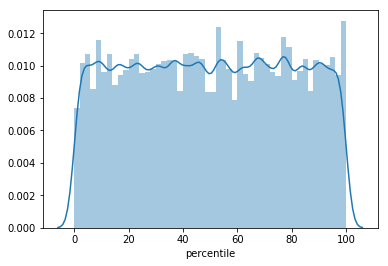

In [52]:
sns.distplot(df_clean['percentile'])

A binary variable is created using the percentile of the global score:
* Percentiles Above 50% -> High_score = True (Students getting a high score)
* Percentiles Below 50% -> High_score = False (Students getting a low score)

Using this outcome, the information value (IV) is measured for the considered relevant variables (from the previous analysis). Using the IV, the variables are analysed and ordered.

IV = ∑ (% of low score - % of high score) * In(% of low score / % of high score)

In [53]:
df_clean['lv_score'] = df_clean['percentile'] > 50
df_clean['lv_score'].value_counts(dropna=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False    439081
True     426598
Name: lv_score, dtype: int64

----------------------------------- ESTU_NACIONALIDAD -----------------------------------


Análisis de la variable ESTU_NACIONALIDAD
# Valores diferentes 9
IV : 0.001


#          %
COLOMBIA        863883  99.792533
VENEZUELA          608   0.070234
OTROS              590   0.068155
ESTADOS UNIDOS     171   0.019753
FRANCIA            138   0.015941
ECUADOR            113   0.013053
PERU                67   0.007740
PANAMA              55   0.006353
ALEMANIA            54   0.006238

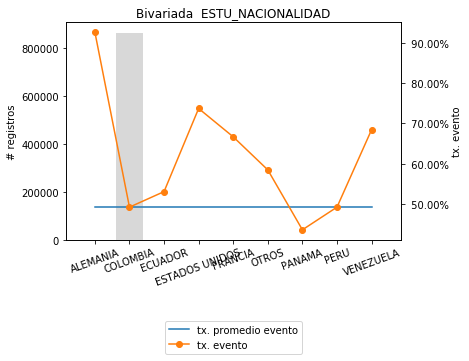



----------------------------------- ESTU_GENERO -----------------------------------


Análisis de la variable ESTU_GENERO
# Valores diferentes 2
IV : 0.038


#          %
F        514636  59.448826
M        351022  40.548748
missing      21   0.002426

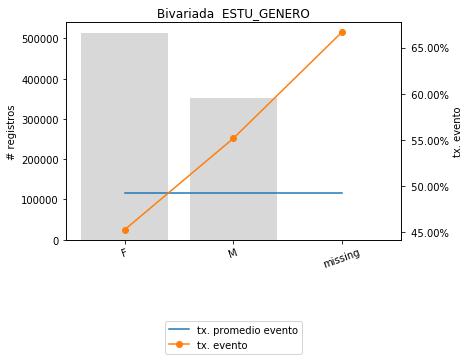



----------------------------------- ESTU_DEPTO_RESIDE -----------------------------------


Análisis de la variable ESTU_DEPTO_RESIDE
# Valores diferentes 34
IV : 0.219


#          %
BOGOTA           251257  29.024269
ANTIOQUIA        103923  12.004796
VALLE             67405   7.786373
ATLANTICO         49407   5.707312
CUNDINAMARCA      47483   5.485059
SANTANDER         43308   5.002778
BOLIVAR           27073   3.127372
NORTE SANTANDER   26031   3.007004
TOLIMA            21867   2.525994
BOYACA            21712   2.508089
CORDOBA           20214   2.335046
NARIÑO            19970   2.306860
CAUCA             18305   2.114525
RISARALDA         18102   2.091075
HUILA             17946   2.073055
CALDAS            17384   2.008135
META              17144   1.980411
CESAR             12764   1.474450
MAGDALENA         12731   1.470637
SUCRE             11136   1.286389
QUINDIO           10531   1.216502
LA GUAJIRA         8368   0.966640
CHOCO              5364   0.619629
CAQUETA            4920   0.568340
CASANARE           4608   0.532299
PUTUMAYO           2797   0.323099
ARAUCA             2199   0.254020
SAN ANDRES          484   0.055910
GUAVIARE            472   0.054524
AMAZONAS            245   0.028301
VICHADA             164   0.018945
VAUPES              135   0.015595
EXTRANJERO          118   0.013631
GUAINIA             112   0.012938

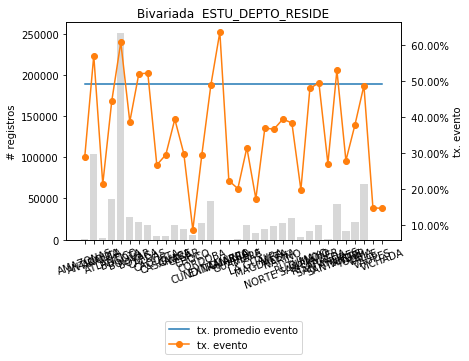



----------------------------------- ESTU_AREARESIDE -----------------------------------


Análisis de la variable ESTU_AREARESIDE
# Valores diferentes 2
IV : 0.036


#          %
Cabecera Municipal  569982  65.842189
missing             226761  26.194583
Area Rural           68936   7.963229

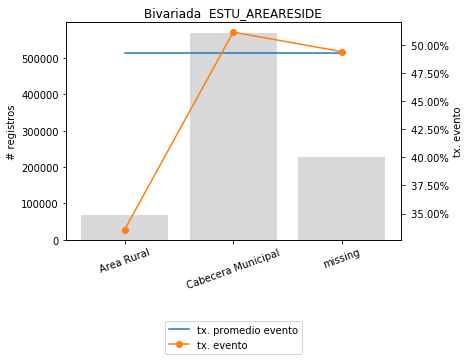



----------------------------------- ESTU_EXTERIOR -----------------------------------


Análisis de la variable ESTU_EXTERIOR
# Valores diferentes 2
IV : 0.005


#          %
NO  863221  99.716061
SI    2458   0.283939

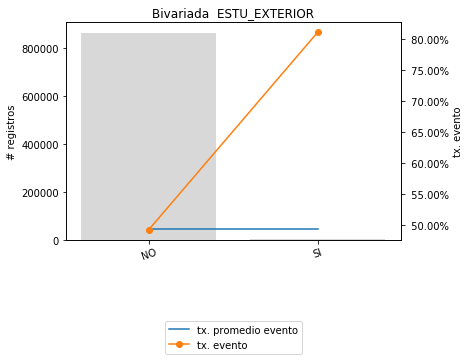



----------------------------------- GRUPOREFERENCIA -----------------------------------


Análisis de la variable GRUPOREFERENCIA
# Valores diferentes 21
IV : 0.257


#          %
ADMINISTRACION Y AFINES                  184596  21.323839
INGENIERIA                               178240  20.589618
EDUCACION                                 91216  10.536931
CONTADURIA Y AFINES                       71657   8.277549
DERECHO                                   71352   8.242316
PSICOLOGIA                                54207   6.261790
SALUD                                     33640   3.885967
COMUNICACION, PERIODISMO Y PUBLICIDAD     29095   3.360946
CIENCIAS SOCIALES                         25320   2.924872
MEDICINA                                  22829   2.637121
BELLAS ARTES Y DISENO                     22681   2.620024
ENFERMERIA                                14739   1.702594
ARQUITECTURA Y URBANISMO                  13967   1.613416
CIENCIAS NATURALES Y EXACTAS              12601   1.455620
ECONOMIA                                  12059   1.393011
CIENCIAS AGROPECUARIAS                    11685   1.349807
HUMANIDADES                                7043   0.813581
RECREACION Y DEPORTES                      3646   0.421172
NORMALES SUPERIORES                        3210   0.370807
CIENCIAS MILITARES Y NAVALES               1521   0.175700
TECNOLOGICO EN ADMINISTRACION Y TURISMO     375   0.043319

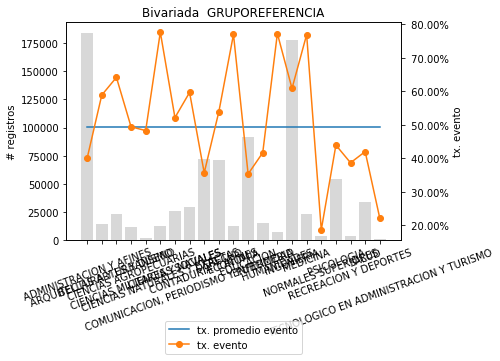



----------------------------------- ESTU_METODO_PRGM -----------------------------------


Análisis de la variable ESTU_METODO_PRGM
# Valores diferentes 5
IV : 0.258


#          %
PRESENCIAL         683436  78.947970
DISTANCIA          149843  17.309303
DISTANCIA VITUAL    26162   3.022136
DISTANCIA VIRTUAL    6169   0.712620
SEMI-PRESENCIAL        69   0.007971

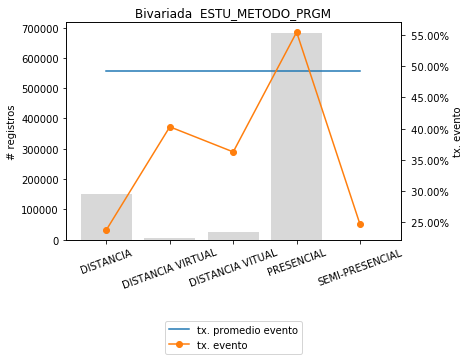



----------------------------------- INST_CARACTER_ACADEMICO -----------------------------------


Análisis de la variable INST_CARACTER_ACADEMICO
# Valores diferentes 5
IV : 0.237


#          %
UNIVERSIDAD                534276  61.717565
INSTITUCIÓN UNIVERSITARIA  298538  34.485993
TÉCNICA PROFESIONAL         20222   2.335970
INSTITUCIÓN TECNOLÓGICA      9433   1.089665
ESCUELA NORMAL SUPERIOR      3210   0.370807

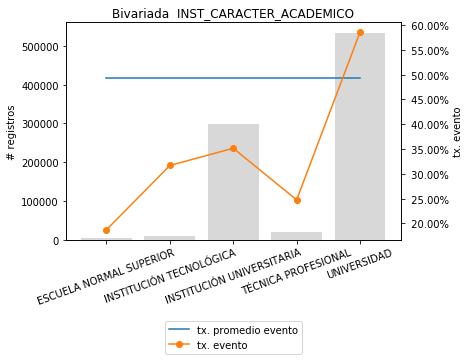



----------------------------------- INST_ORIGEN -----------------------------------


Análisis de la variable INST_ORIGEN
# Valores diferentes 6
IV : 0.074


#          %
NO OFICIAL - CORPORACIÓN  311833  36.021782
NO OFICIAL - FUNDACIÓN    259005  29.919289
OFICIAL DEPARTAMENTAL     140137  16.188102
OFICIAL NACIONAL          132970  15.360197
OFICIAL MUNICIPAL          18297   2.113601
REGIMEN ESPECIAL            3437   0.397029

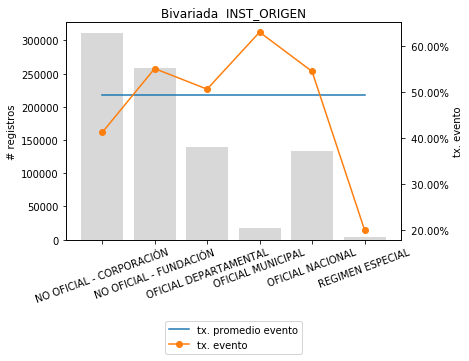



----------------------------------- CARACTER -----------------------------------


Análisis de la variable CARACTER
# Valores diferentes 3
IV : 0.018


#          %
PRIVADA           570838  65.941071
PUBLICA           291404  33.661900
REGIMEN ESPECIAL    3437   0.397029

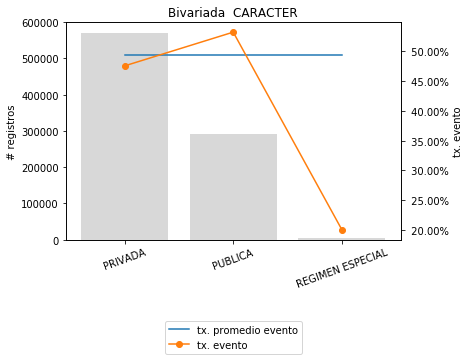



----------------------------------- PAGOMATRICULA -----------------------------------


Análisis de la variable PAGOMATRICULA
# Valores diferentes 5
IV : 0.102


#          %
PADRES   301188  34.792111
CREDITO  240219  27.749200
PROPIO   179972  20.789692
BECA     135342  15.634202
missing    5430   0.627253
OTRO       3528   0.407541

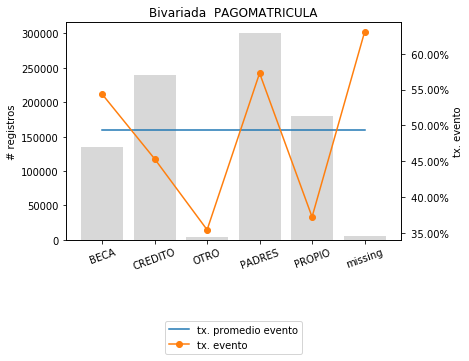



----------------------------------- ESTU_VALORMATRICULAUNIVERSIDAD -----------------------------------


Análisis de la variable ESTU_VALORMATRICULAUNIVERSIDAD
# Valores diferentes 8
IV : 0.388


#          %
Entre 1 millón y menos de 2.5 millones    263110  30.393483
Entre 2.5 millones y menos de 4 millones  169552  19.586013
Menos de 500 mil                          122390  14.138035
Entre 500 mil y menos de 1 millón         110341  12.746180
Entre 4 millones y menos de 5.5 millones   81683   9.435715
Mas de 7 millones                          68734   7.939895
Entre 5.5 millones y menos de 7 millones   42385   4.896157
No pagó matrícula                           7484   0.864524
missing                                        0   0.000000

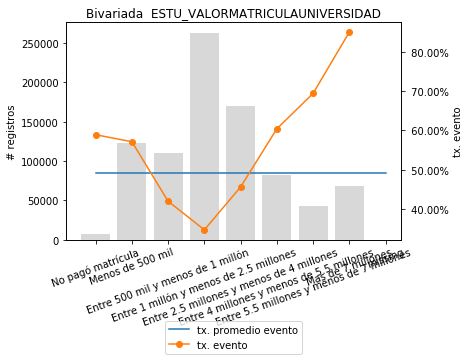



----------------------------------- ESTU_SEMESTRECURSA -----------------------------------


Análisis de la variable ESTU_SEMESTRECURSA
# Valores diferentes 12
IV : 0.036


#          %
missing  230023  26.571397
10.0     213366  24.647242
9.0      213240  24.632687
8.0      123508  14.267182
7.0       35501   4.100943
11.0      24673   2.850133
12.0      13938   1.610066
6.0        4895   0.565452
4.0        3323   0.383861
5.0        2108   0.243508
3.0         704   0.081323
2.0         284   0.032807
1.0         116   0.013400

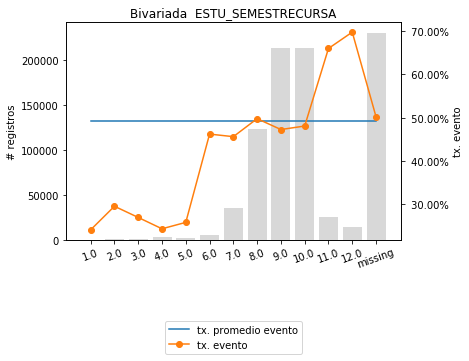



----------------------------------- ESTU_DEDICACIONINTERNET -----------------------------------


Análisis de la variable ESTU_DEDICACIONINTERNET
# Valores diferentes 3
IV : 0.019


#          %
Entre 1 y 3 horas  375034  43.322525
missing            200406  23.150151
Menos de una hora  168488  19.463104
Más de 4 horas     121751  14.064220

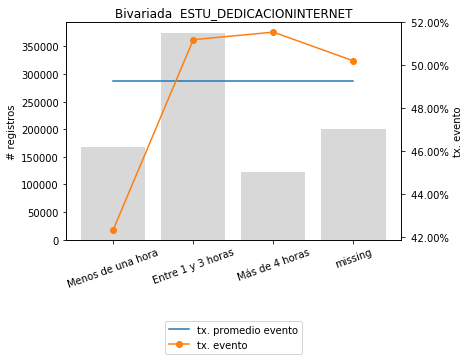



----------------------------------- ESTU_DEDICACIONLECTURADIARIA -----------------------------------


Análisis de la variable ESTU_DEDICACIONLECTURADIARIA
# Valores diferentes 5
IV : 0.013


#          %
30 minutos o menos          241252  27.868529
Entre 30 y 60 minutos       238865  27.592791
missing                     199251  23.016730
Entre 1 y 2 horas            88970  10.277482
No leo por entretenimiento   65824   7.603742
Más de 2 horas               31517   3.640726

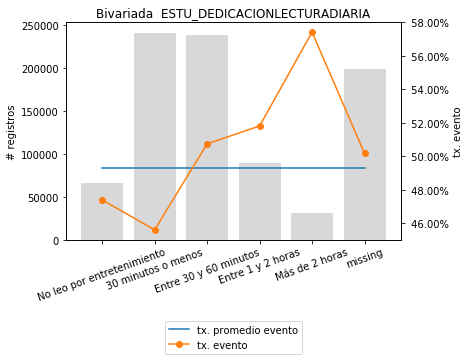



----------------------------------- ESTU_HORASSEMANATRABAJA -----------------------------------


Análisis de la variable ESTU_HORASSEMANATRABAJA
# Valores diferentes 5
IV : 0.052


#          %
Más de 30 horas      331858  38.334995
0                    210280  24.290759
Entre 11 y 20 horas  113224  13.079213
Menos de 10 horas     98710  11.402610
Entre 21 y 30 horas   96790  11.180819
missing               14817   1.711604

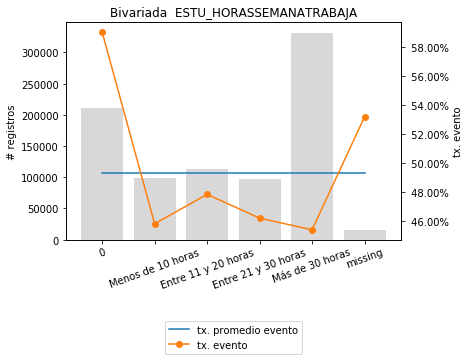



----------------------------------- FAMI_NUMLIBROS -----------------------------------


Análisis de la variable FAMI_NUMLIBROS
# Valores diferentes 4
IV : 0.212


#          %
0 A 10 LIBROS      203703  23.531009
missing            199251  23.016730
11 A 25 LIBROS     197174  22.776803
26 A 100 LIBROS    194454  22.462599
MÁS DE 100 LIBROS   71097   8.212860

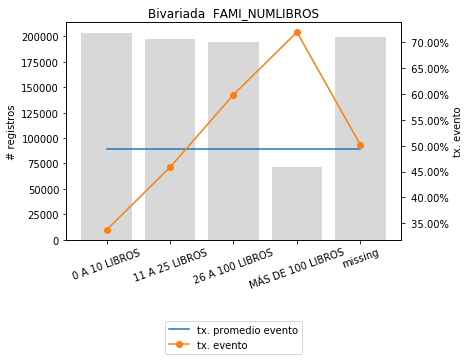



----------------------------------- FAMI_EDUCACIONPADRE -----------------------------------


Análisis de la variable FAMI_EDUCACIONPADRE
# Valores diferentes 11
IV : 0.250


#          %
Secundaria (Bachillerato) completa    172656  19.944575
Primaria incompleta                   145105  16.761987
Educación profesional completa        109348  12.631472
Secundaria (Bachillerato) incompleta   95572  11.040120
Primaria completa                      83539   9.650113
Técnica o tecnológica completa         75671   8.741231
Postgrado                              52724   6.090479
Ninguno                                31734   3.665793
Educación profesional incompleta       30017   3.467452
Técnica o tecnológica incompleta       25491   2.944625
No sabe/No Aplica                      23674   2.734732
missing                                20148   2.327422

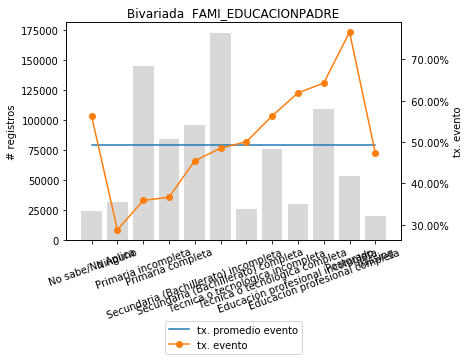



----------------------------------- FAMI_EDUCACIONMADRE -----------------------------------


Análisis de la variable FAMI_EDUCACIONMADRE
# Valores diferentes 11
IV : 0.267


#          %
Secundaria (Bachillerato) completa    191187  22.085207
Primaria incompleta                   118543  13.693644
Educación profesional completa        108412  12.523349
Secundaria (Bachillerato) incompleta  107770  12.449187
Técnica o tecnológica completa        103692  11.978112
Primaria completa                      82592   9.540719
Postgrado                              52956   6.117279
Técnica o tecnológica incompleta       30451   3.517586
Educación profesional incompleta       27093   3.129682
missing                                20197   2.333082
Ninguno                                17610   2.034241
No sabe/No Aplica                       5176   0.597912

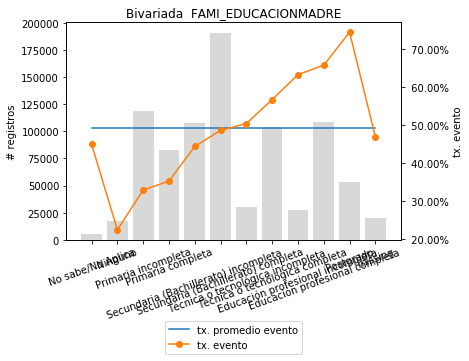



----------------------------------- FAMI_TRABAJOLABORPADRE -----------------------------------


Análisis de la variable FAMI_TRABAJOLABORPADRE
# Valores diferentes 23
IV : 0.087


#          %
Trabajador por cuenta propia                        121059  13.984283
Obrero o empleado de empresa particular              92919  10.733655
No aplica                                            86335   9.973096
Pensionado                                           83432   9.637753
Trabaja por cuenta propia (por ejemplo plomero,...   50503   5.833918
Otra actividad u ocupación                           49275   5.692064
Es dueño de un negocio pequeño (tiene pocos emp...   48483   5.600575
Trabaja como profesional (por ejemplo médico, a...   47384   5.473622
Es operario de máquinas o conduce vehículos (ta...   35640   4.116999
Es agricultor, pesquero o jornalero                  32476   3.751506
Patrón o empleador                                   29139   3.366028
Trabaja en el hogar, no trabaja o estudia            27792   3.210428
Obrero o empleado del gobierno                       25708   2.969692
missing                                              23484   2.712784
Tiene un trabajo de tipo auxiliar administrativ...   18881   2.181062
Trabaja como personal de limpieza, mantenimient...   17399   2.009867
Es vendedor o trabaja en atención al público         16661   1.924616
No sabe                                              15999   1.848145
Desempleado                                          14869   1.717611
Es dueño de un negocio grande, tiene un cargo d...   13563   1.566747
Jornalero o peón                                      9015   1.041379
Trabajador sin remuneración en empresas o negoc...    2223   0.256793
Empleado doméstico                                    2007   0.231841
Trabajador familiar sin remuneración                  1433   0.165535

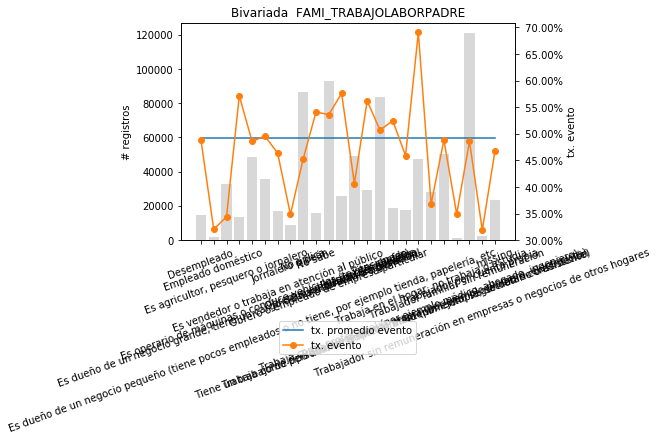



----------------------------------- FAMI_TRABAJOLABORMADRE -----------------------------------


Análisis de la variable FAMI_TRABAJOLABORMADRE
# Valores diferentes 23
IV : 0.086


#          %
Trabaja en el hogar, no trabaja o estudia           148564  17.161558
Trabajador por cuenta propia                         90640  10.470394
No aplica                                            64456   7.445716
Obrero o empleado de empresa particular              57595   6.653159
Pensionado                                           49642   5.734458
Desempleado                                          47034   5.433192
Trabaja como profesional (por ejemplo médico, a...   46979   5.426838
Otra actividad u ocupación                           46192   5.335927
Es dueño de un negocio pequeño (tiene pocos emp...   44093   5.093458
Empleado doméstico                                   42634   4.924920
Obrero o empleado del gobierno                       37326   4.311760
Trabajador familiar sin remuneración                 32336   3.735334
Tiene un trabajo de tipo auxiliar administrativ...   30252   3.494598
missing                                              22774   2.630767
Trabaja como personal de limpieza, mantenimient...   21325   2.463384
Es vendedor o trabaja en atención al público         19153   2.212483
Trabaja por cuenta propia (por ejemplo plomero,...   18948   2.188802
Patrón o empleador                                   14278   1.649341
Es dueño de un negocio grande, tiene un cargo d...    8814   1.018160
Es agricultor, pesquero o jornalero                   8068   0.931985
Es operario de máquinas o conduce vehículos (ta...    6573   0.759288
Trabajador sin remuneración en empresas o negoc...    3537   0.408581
No sabe                                               3503   0.404653
Jornalero o peón                                       963   0.111242

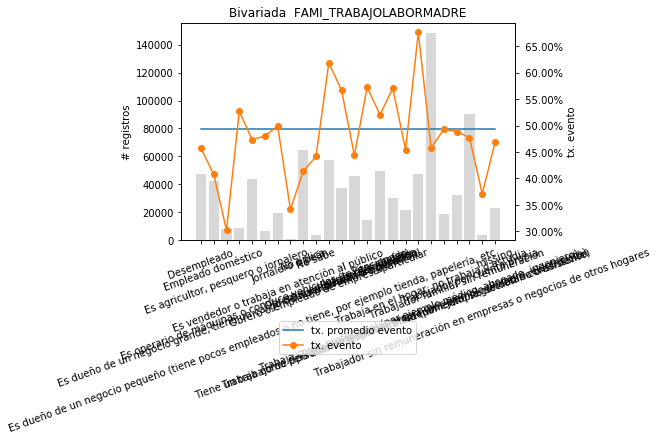



----------------------------------- FAMI_ESTRATOVIVIENDA -----------------------------------


Análisis de la variable FAMI_ESTRATOVIVIENDA
# Valores diferentes 7
IV : 0.236


#          %
2.0      286434  33.087784
3.0      282817  32.669962
1.0      124985  14.437800
4.0       91063  10.519257
5.0       32197   3.719277
missing   27655   3.194602
6.0       16679   1.926696
0.0        3849   0.444622

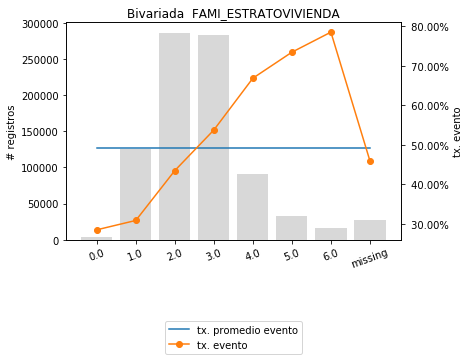

var     IV
0  ESTU_VALORMATRICULAUNIVERSIDAD  0.388
0             FAMI_EDUCACIONMADRE  0.267
0                ESTU_METODO_PRGM  0.258
0                 GRUPOREFERENCIA  0.257
0             FAMI_EDUCACIONPADRE  0.250
0         INST_CARACTER_ACADEMICO  0.237
0            FAMI_ESTRATOVIVIENDA  0.236
0               ESTU_DEPTO_RESIDE  0.219
0                  FAMI_NUMLIBROS  0.212
0                   PAGOMATRICULA  0.102
0          FAMI_TRABAJOLABORPADRE  0.087
0          FAMI_TRABAJOLABORMADRE  0.086
0                     INST_ORIGEN  0.074
0         ESTU_HORASSEMANATRABAJA  0.052
0                     ESTU_GENERO  0.038
0              ESTU_SEMESTRECURSA  0.036
0                 ESTU_AREARESIDE  0.036
0         ESTU_DEDICACIONINTERNET  0.019
0                        CARACTER  0.018
0    ESTU_DEDICACIONLECTURADIARIA  0.013
0                   ESTU_EXTERIOR  0.005
0               ESTU_NACIONALIDAD  0.001

In [54]:
list_sel = ['ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE',
            'ESTU_EXTERIOR','GRUPOREFERENCIA','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','INST_ORIGEN',
            'CARACTER','PAGOMATRICULA','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_SEMESTRECURSA',
            'ESTU_DEDICACIONINTERNET','ESTU_DEDICACIONLECTURADIARIA','ESTU_HORASSEMANATRABAJA','FAMI_NUMLIBROS',
            'FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE',
            'FAMI_ESTRATOVIVIENDA']#Estrato fue cambiado por INSE que es continuo

IVS_cat = pd.DataFrame([],columns=['var','IV'])
for feat_df in list_sel:
    print('----------------------------------- {} -----------------------------------'.format(feat_df))
    feat_name, IV = funcs.analise_biv(df_clean, feat_df, label='', fl_ordena=0, num=False,
                                  q=0, q2=0, y='lv_score')
    IVS_cat = pd.concat([IVS_cat,pd.DataFrame(data={'var': [feat_name], 'IV': [IV]})])
IVS_cat.sort_values(by=['IV'],ascending=False)

----------------------------------- FAMI_PERSONASHOGAR -----------------------------------


Análisis de la variable FAMI_PERSONASHOGAR_cat
# Valores diferentes 4
IV : 0.004


#          %
(0.999, 3.0]  278581  32.180635
(3.0, 4.0]    201543  23.281493
missing       199251  23.016730
(4.0, 5.0]    111524  12.882835
(5.0, 12.0]    74780   8.638306

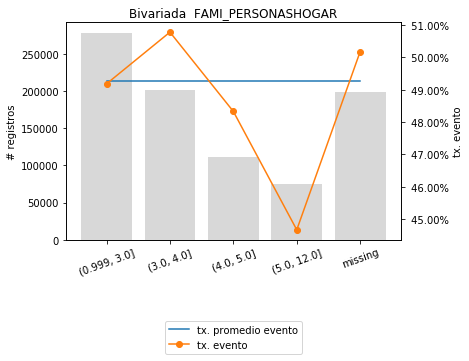



----------------------------------- ESTU_INSE_INDIVIDUAL -----------------------------------


Análisis de la variable ESTU_INSE_INDIVIDUAL_cat
# Valores diferentes 4
IV : 0.255


#          %
(43.222, 51.006]  249443  28.814722
(51.006, 60.573]  249442  28.814607
(60.573, 91.48]   166295  19.209776
(13.877, 43.222]  166295  19.209776
missing            34204   3.951118

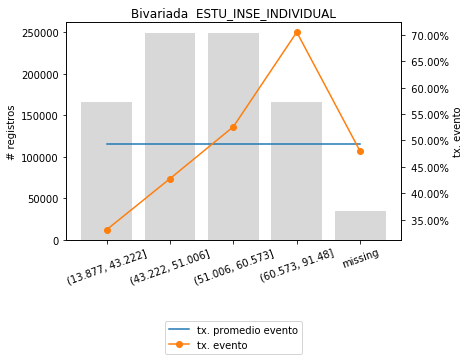



----------------------------------- AGE_APROX -----------------------------------


Análisis de la variable AGE_APROX_cat
# Valores diferentes 4
IV : 0.263


#          %
(10.999, 22.0]  275770  31.855919
(24.0, 30.0]    227453  26.274520
(22.0, 24.0]    197640  22.830634
(30.0, 69.0]    164739  19.030033
missing             77   0.008895

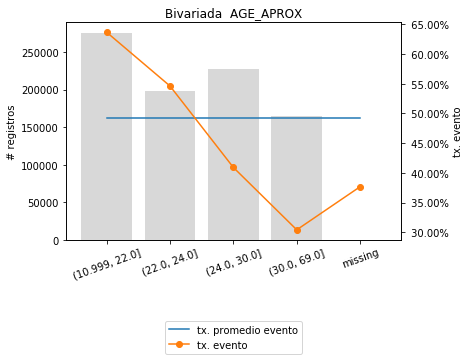



----------------------------------- TASA_HOMICIDIOS_4_LOG -----------------------------------


Análisis de la variable TASA_HOMICIDIOS_4_LOG_cat
# Valores diferentes 4
IV : 0.058


#          %
(2.725, 2.89]   258993  29.917903
(2.89, 3.387]   257940  29.796264
(0.756, 2.725]  175388  20.260166
(3.387, 5.585]  169203  19.545698
missing           4155   0.479970

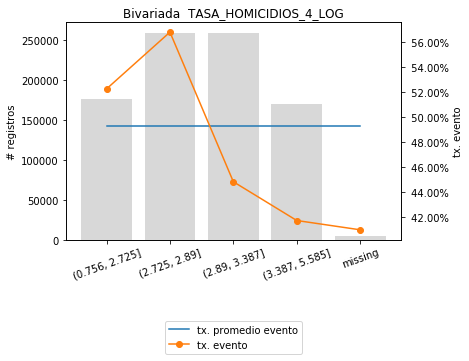



----------------------------------- TASA_HOMICIDIOS_1_LOG -----------------------------------


Análisis de la variable TASA_HOMICIDIOS_1_LOG_cat
# Valores diferentes 4
IV : 0.051


#          %
(2.701, 2.897]  280134  32.360032
(2.897, 3.364]  236259  27.291756
(0.747, 2.701]  175719  20.298402
(3.364, 5.633]  168412  19.454324
missing           5155   0.595486

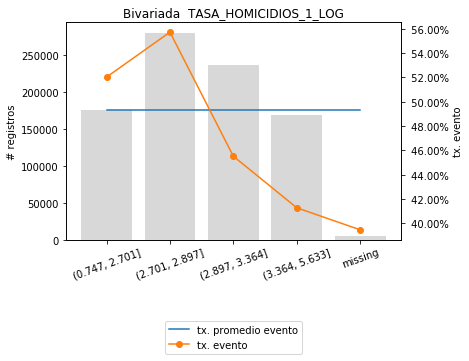

var     IV
0              AGE_APROX  0.263
0   ESTU_INSE_INDIVIDUAL  0.255
0  TASA_HOMICIDIOS_4_LOG  0.058
0  TASA_HOMICIDIOS_1_LOG  0.051
0     FAMI_PERSONASHOGAR  0.004

In [51]:
list_sel = ['FAMI_PERSONASHOGAR','ESTU_INSE_INDIVIDUAL','AGE_APROX',
            'TASA_HOMICIDIOS_4_LOG','TASA_HOMICIDIOS_1_LOG']

IVS_cat = pd.DataFrame([],columns=['var','IV'])
for feat_df in list_sel:
    print('----------------------------------- {} -----------------------------------'.format(feat_df))
    feat_name, IV = funcs.analise_biv(df_clean, feat_df, label='', fl_ordena=0, num=True,
                                  q=0, q2=0, y='lv_score')
    IVS_cat = pd.concat([IVS_cat,pd.DataFrame(data={'var': [feat_name], 'IV': [IV]})])
IVS_cat.sort_values(by=['IV'],ascending=False)